# Import Library

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
import matplotlib.font_manager as fm
import logging
from adjustText import adjust_text
import matplotlib.cm as cm
import scipy.stats as stats
# from sklearn.cluster import KMeans
from matplotlib_venn import venn3
import plotly
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.colors as colors
from IPython.display import display
import matplotlib

# Set the logging level to suppress the warning messages
logging.getLogger("matplotlib").setLevel(logging.ERROR)

# Set the default style for the plots
plt.style.use('default')

#Addon Function
def dh(df):
    display(df.head())

# Load Data

In [86]:
c_acting_leading_credit_data = pd.read_csv(f"""/Users/thanyalak/Desktop/5001_Movie_Analysis/cleaned_data/c_acting_leading_credit_data.csv""",sep = '|')
c_actor_supporting_credits_data = pd.read_csv(f"""/Users/thanyalak/Desktop/5001_Movie_Analysis/cleaned_data/c_actor_supporting_credits_data.csv""",sep = '|')
c_all_acting_credits = pd.read_csv(f"""/Users/thanyalak/Desktop/5001_Movie_Analysis/cleaned_data/c_all_acting_credits.csv""",sep = '|')
c_worldwide_leading_star = pd.read_csv(f"""/Users/thanyalak/Desktop/5001_Movie_Analysis/cleaned_data/c_worldwide_leading_star.csv""",sep = '|')
c_star_info_data = pd.read_csv(f"""/Users/thanyalak/Desktop/5001_Movie_Analysis/cleaned_data/c_star_info_data.csv""",sep = '|')
c_star_summary = pd.read_csv(f"""/Users/thanyalak/Desktop/5001_Movie_Analysis/cleaned_data/c_star_summary.csv""",sep = '|')
# -----------------------------------------------------------------
folder_path = "/Users//thanyalak//Desktop//5001_Movie_Analysis//imdb_data//"
#/Users/thanyalak/Desktop/5001_Movie_Analysis/imdb_data

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    if filename.endswith('.csv'):
        print(filename.replace('.csv',''))
        exec(f"""{filename.replace('.csv','')} = pd.read_csv(r"{file_path}")  """)
# -----------------------------------------------------------------
def dh(df):
    display(df.head())

fiter_top_1000 = c_worldwide_leading_star[c_worldwide_leading_star['Rank_u'] <= 300 ]['Name']

bafta_awards
new_Rotten_movie
Cleanimbdvote50_120k
academy_awards
cleaned_genres
golden_globe_awards


In [87]:
# # The code reads multiple CSV files using pandas and assigns them to respective variables.

# # Read the 'c_acting_leading_credit_data' CSV file
# c_acting_leading_credit_data = pd.read_csv(r"""C:\Playground\DADS_5001_Tools\movie_pj\cleaned_csv_file\c_acting_leading_credit_data.csv""", sep='|')

# # Read the 'c_actor_supporting_credits_data' CSV file
# c_actor_supporting_credits_data = pd.read_csv(r"""C:\Playground\DADS_5001_Tools\movie_pj\cleaned_csv_file\c_actor_supporting_credits_data.csv""", sep='|')

# # Read the 'c_all_acting_credits' CSV file
# c_all_acting_credits = pd.read_csv(r"""C:\Playground\DADS_5001_Tools\movie_pj\cleaned_csv_file\c_all_acting_credits.csv""", sep='|')

# # Read the 'c_worldwide_leading_star' CSV file
# c_worldwide_leading_star = pd.read_csv(r"""C:\Playground\DADS_5001_Tools\movie_pj\cleaned_csv_file\c_worldwide_leading_star.csv""", sep='|')

# # Read the 'c_star_info_data' CSV file
# c_star_info_data = pd.read_csv(r"""C:\Playground\DADS_5001_Tools\movie_pj\cleaned_csv_file\c_star_info_data.csv""", sep='|')

# # Read the 'c_star_summary' CSV file
# c_star_summary = pd.read_csv(r"""C:\Playground\DADS_5001_Tools\movie_pj\cleaned_csv_file\c_star_summary.csv""", sep='|')

# # -----------------------------------------------------------------
# # Define the folder path where other CSV files are located
# folder_path = "C:\\Playground\\DADS_5001_Tools\\movie_pj\\raw_data\\other_source\\"

# # Loop through the files in the folder
# for filename in os.listdir(folder_path):
#     file_path = os.path.join(folder_path, filename)
    
#     # Check if the file is a CSV file
#     if filename.endswith('.csv'):
#         print(filename.replace('.csv',''))
        
#         # Read the CSV file and assign it to a variable with the same name as the file (without the '.csv' extension)
#         exec(f"""{filename.replace('.csv','')} = pd.read_csv(r"{file_path}")""")
        
# # -----------------------------------------------------------------
# # Define a function 'dh' to display the head of a DataFrame
# def dh(df):
#     display(df.head())

# # Filter the top 1000 records from the 'c_worldwide_leading_star' DataFrame based on a condition
# fiter_top_1000 = c_worldwide_leading_star[c_worldwide_leading_star['Rank_u'] <= 300]['Name']


# 1.Movie Industrial Analysis

## [6520422030] Data Transform

In [88]:
# Concatenating two dataframes: c_acting_leading_credit_data and c_actor_supporting_credits_data
credit_ap = pd.concat([c_acting_leading_credit_data, c_actor_supporting_credits_data], axis=0)

# Converting 'release_date' column to datetime format
credit_ap['rl_date_time'] = pd.to_datetime(credit_ap['release_date'], errors='coerce')

# Grouping the dataframe by 'rl_date_time' and calculating the sum of selected columns
summ_credit_ap = credit_ap.groupby(by=['rl_date_time']).sum(['opening_weekend_u', 'summ_credit_ap', 'domestic_box_office_u', 'worldwide_box_office_u'])

# Dividing selected columns by 1,000,000,000 (to convert values to billions)
div_thousand_col = ['opening_weekend_u', 'domestic_box_office_u', 'worldwide_box_office_u']
for col in div_thousand_col:
    summ_credit_ap[col] = summ_credit_ap[col] / 1000000000

# Extracting the year from the index and assigning it to a new column 'year_tmp'
summ_credit_ap['year_tmp'] = summ_credit_ap.index.year

# Creating a copy of summ_credit_ap dataframe
summ_credit_ap_yr = summ_credit_ap

# Extracting the year from the index and assigning it to a new column 'year_rl'
summ_credit_ap_yr['year_rl'] = summ_credit_ap_yr.index.year

# Grouping the summ_credit_ap_yr dataframe by 'year_rl' and calculating the sum of all columns
summ_credit_ap_yr = summ_credit_ap_yr.groupby(by=['year_rl']).sum()

# Counting the number of movies per year and creating a new dataframe count_credit_ap
count_credit_ap = summ_credit_ap.groupby('year_tmp').size().to_frame().rename(columns={0: 'movies'})

# Merging count_credit_ap dataframe with summ_credit_ap_yr dataframe based on the index (year)
summ_credit_ap_yr = pd.merge(summ_credit_ap_yr, count_credit_ap, left_index=True, right_index=True)

# Filtering the summ_credit_ap_yr dataframe to include years between 1980 and 2022 (inclusive)
summ_credit_ap_yr = summ_credit_ap_yr[(summ_credit_ap_yr.index >= 1980) & (summ_credit_ap_yr.index <= 2022)]

# Calculating the average worldwide box office revenue per movie and adding it as a new column
summ_credit_ap_yr['Average Worldwide Box Office'] = 100 * summ_credit_ap_yr['worldwide_box_office_u'] / summ_credit_ap_yr['movies']

# Displaying the last 10 rows of summ_credit_ap_yr dataframe
summ_credit_ap_yr.tail(10)


opening_weekend_u  max_theaters_u  domestic_box_office_u  \
year_rl                                                             
2013             27.617332       3250819.0              92.811502   
2014             30.030597       3447473.0             100.537417   
2015             35.034063       3567199.0             113.780443   
2016             36.483705       4045934.0             113.192865   
2017             34.590176       3771205.0             110.610301   
2018             36.038559       3643066.0             115.000628   
2019             46.782620       3656135.0             141.483209   
2020              3.348301        856614.0               9.247950   
2021             14.115704       1927952.0              42.604029   
2022             16.223099       1789888.0              54.015048   

         worldwide_box_office_u  domestic_share_float  year_tmp  movies  \
year_rl                                                                   
2013                 233.850811              1176.937    231495     115   
2014                 262.154406              1340.528    233624     116   
2015                 306.794574              1233.103    270010     134   
2016                 289.143842              1381.013    245952     122   
2017                 296.929160              1024.816    231955     115   
2018                 306.398998              1004.589    264358     131   
2019                 391.611807              1004.793    300831     149   
2020                  30.500349               431.421    335320     166   
2021                 113.560444               612.931    317297     157   
2022                 128.556723               510.250    293190     145   

         Average Worldwide Box Office  
year_rl                                
2013                       203.348531  
2014                       225.995178  
2015                       228.951175  
2016                       237.003149  
2017                       258.199270  
2018                       233.892365  
2019                       262.826716  
2020                        18.373704  
2021                        72.331493  
2022                        88.659809

## Comparison between Average Worldwide Gross and Number of Movies per Year [6520422030]

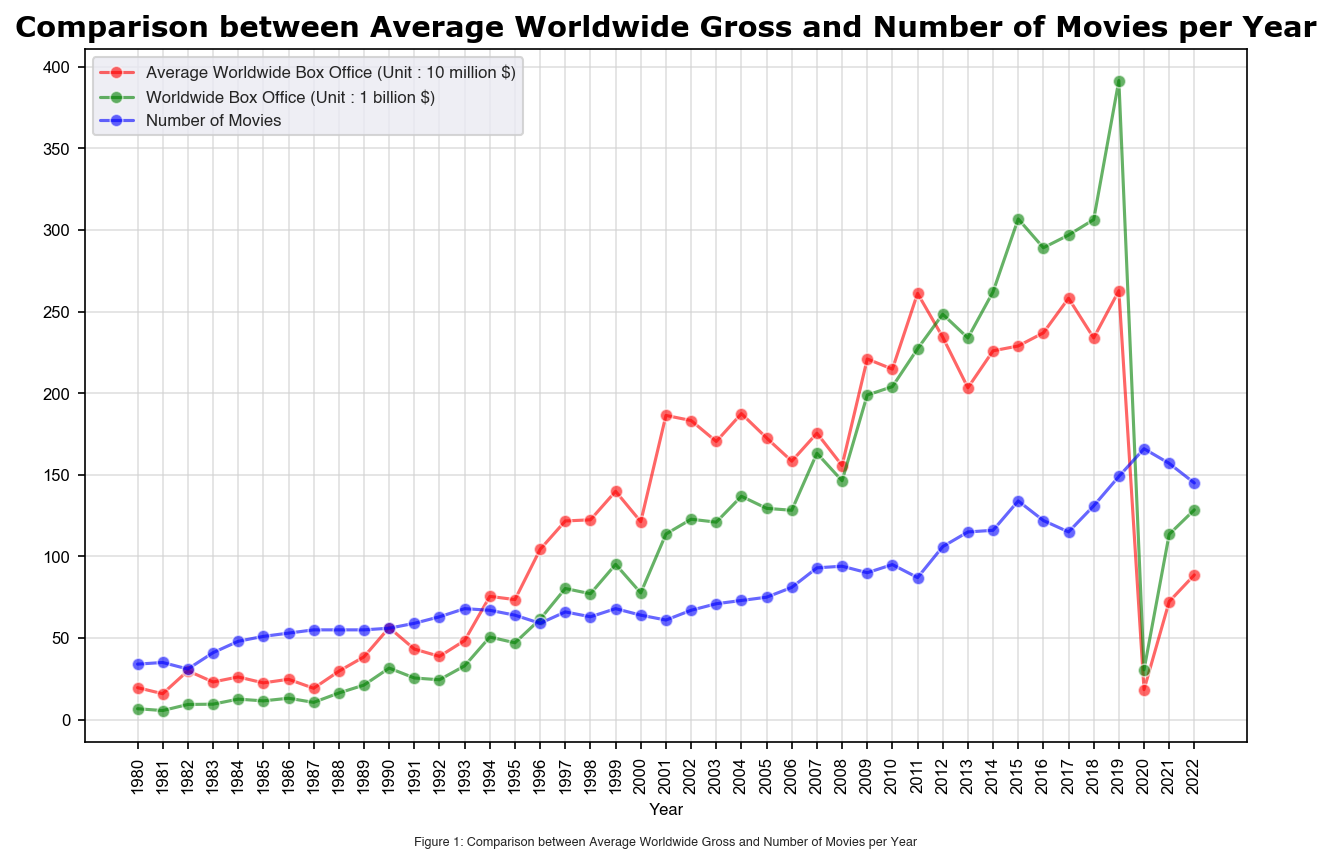

In [89]:
# Create the area chart
plt.figure(dpi=150, figsize=(10, 6), facecolor='white')
plt.title('Comparison between Average Worldwide Gross and Number of Movies per Year',
          fontdict={'fontname': 'Verdana', 'color': 'black', 'fontsize': 14, 'fontweight': 'bold'})

# Set font to Helvetica
sns.set(font='Helvetica')

# Plot line chart for 'Average Worldwide Box Office'
sns.lineplot(data=summ_credit_ap_yr, x=summ_credit_ap_yr.index, y='Average Worldwide Box Office',
             color='red', marker='o', label='Average Worldwide Box Office (Unit : 10 million $)', alpha=0.6)

# Plot line chart for 'Worldwide Box Office'
sns.lineplot(data=summ_credit_ap_yr, x=summ_credit_ap_yr.index, y='worldwide_box_office_u',
             color='green', marker='o', label='Worldwide Box Office (Unit : 1 billion $)', alpha=0.6)

# Plot line chart for 'Number of Movies'
sns.lineplot(data=summ_credit_ap_yr, x=summ_credit_ap_yr.index, y='movies',
             color='blue', marker='o', label='Number of Movies', alpha=0.6)

# Set x-axis tick locations and labels, rotate x-axis 90 degrees
start_year = 1980
end_year = 2022
plt.xticks(range(start_year, end_year + 1, 1), rotation=90, ha='center', fontsize=8)

# Set y-axis tick locations and labels
plt.yticks(np.arange(0, 401, step=50), fontsize=8)

# Set x-axis label
plt.xlabel('Year', fontdict={'fontname': 'Helvetica', 'fontsize': 8})

# Set y-axis label (empty string to remove the label)
plt.ylabel('')

# Set grid
plt.grid(color='lightgrey', alpha=0.7)

# Set legend
legend_font = {'family': 'Helvetica', 'size': 8}
plt.legend(prop=legend_font)

# Annotate the figure name
figure_name = 'Figure 1: Comparison between Average Worldwide Gross and Number of Movies per Year'
plt.text(0.5, -0.15, figure_name, transform=plt.gca().transAxes, fontsize=6, fontname = 'Helvetica', ha='center')

# Show the plot
plt.show()


# 2.IMDB + Oscar

## [6520412006] Data Transform

In [90]:
pd.merge(Cleanimbdvote50_120k[['title','imdb_rating','year']], academy_awards,
                               left_on='title', right_on='winner', how='outer')

title  imdb_rating  year_x  year_y  \
0                28 Weeks Later          6.9  2007.0     NaN   
1          Inglourious Basterds          8.3  2009.0     NaN   
2                    Mr. Holmes          6.8  2015.0     NaN   
3     The Chronicles of Riddick          6.6  2004.0     NaN   
4                         Felon          7.4  2008.0     NaN   
...                         ...          ...     ...     ...   
4010                        NaN          NaN     NaN  2022.0   
4011                        NaN          NaN     NaN  2022.0   
4012                        NaN          NaN     NaN  2022.0   
4013                        NaN          NaN     NaN  2022.0   
4014                        NaN          NaN     NaN  2022.0   

                                           awards_name winner winner_details  \
0                                                  NaN    NaN            NaN   
1                                                  NaN    NaN            NaN   
2                                                  NaN    NaN            NaN   
3                                                  NaN    NaN            NaN   
4                                                  NaN    NaN            NaN   
...                                                ...    ...            ...   
4010                        Best Animated Feature Film    NaN            NaN   
4011                   Best International Feature Film    NaN            NaN   
4012                   Best Motion Picture of the Year    NaN            NaN   
4013    Best Performance by an Actor in a Leading Role    NaN            NaN   
4014  Best Performance by an Actress in a Leading Role    NaN            NaN   

                                               nominees  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
4010  Encanto,Flee,Luca,Raya and the Last Dragon,The...   
4011  Drive My Car,Flee,Lunana: A Yak in the Classro...   
4012  Belfast,CODA,Don't Look Up,Drive My Car,Dune,K...   
4013  Andrew Garfield,Benedict Cumberbatch,Denzel Wa...   
4014  Jessica Chastain,Kristen Stewart,Nicole Kidman...   

                                       nominees_details  
0                                                   NaN  
1                                                   NaN  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
4010  Jared Bush, Byron Howard, Yvett Merino, Clark ...  
4011                                                  ,  
4012  Laura Berwick (producer), Kenneth Branagh (pro...  
4013  tick, tick...BOOM!,The Power of the Dog,The Tr...  
4014  The Eyes of Tammy Faye,Spencer,Being the Ricar...  

[4015 rows x 9 columns]

In [91]:
# Merge two dataframes to combine IMDb ratings and Academy Awards data
academy_awards_imdb = pd.merge(Cleanimbdvote50_120k[['title','imdb_rating','year']], academy_awards,
                               left_on='title', right_on='winner', how='outer')

# Combine the 'year' columns and convert them to integer type
academy_awards_imdb['year'] = academy_awards_imdb['year_x'].combine_first(academy_awards_imdb['year_y']).astype('int')

# Create a new column 'awards_mov' based on specific conditions
academy_awards_imdb['awards_mov'] = np.where(academy_awards_imdb['awards_name'].str.contains('Actor|Actress|Direct'),
                                             'Non-award movie', academy_awards_imdb['awards_name'])

# Assign the merged dataframe to 'df' variable
df = academy_awards_imdb

# Define the mapping conditions and corresponding values for 'awards_mov' column
conditions = [
    df['awards_mov'].isin(['Best Picture', 'Best Motion Picture of the Year', 'Best Picture, Production']),
    df['awards_mov'].isin(['Best Foreign Language Film', 'Best Foreign Language Film of the Year',
                           'Best International Feature Film']),
    df['awards_mov'].isin(['Best Animated Feature Film', 'Best Animated Feature',
                           'Best Animated Feature Film of the Year']),
    df['awards_mov'] == 'Best Picture, Unique and Artistic Production'
]
values = [
    'Best Picture',
    'Best Foreign Language Film',
    'Best Animated Feature Film',
    ''
]

# Use np.select() to map values based on conditions to the 'awards_mov' column
academy_awards_imdb['awards_mov'] = np.select(conditions, values, default=df['awards_mov'])

# Create a new column 'ind_awards_mov' based on conditions
academy_awards_imdb['ind_awards_mov'] = np.where(academy_awards_imdb['awards_name'].str.contains('Actor|Actress|Direct'),
                                                 academy_awards_imdb['awards_name'], '')
academy_awards_imdb['ind_awards_mov'] = academy_awards_imdb['ind_awards_mov'].fillna('')

# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------


## [6520412006] IMDB Rating vs Year by Oscar Movie Award

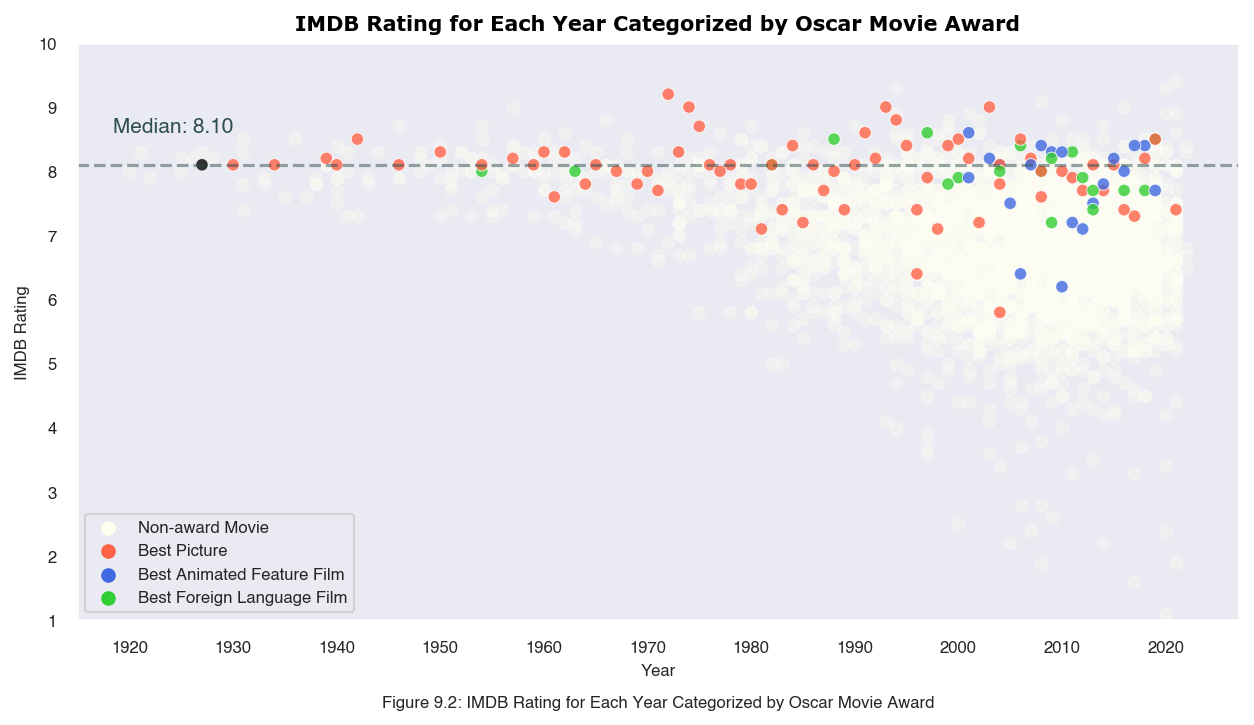

In [92]:
category_colors = {
    'Non-award Movie': 'ivory',
    'Best Picture': 'tomato',
    'Best Animated Feature Film': 'royalblue',
    'Best Foreign Language Film': 'limegreen'
}

def award_imdb_year(df, category_colors=category_colors):
    plt.figure(dpi=150, figsize=(10, 5))
    
    # set font
    sns.set(font = 'Helvetica')
    
    sns.scatterplot(data=df[df['awards_mov'] == 'Non-award movie'], x='year', y='imdb_rating', alpha=0.3, 
                    color=category_colors['Non-award Movie'], label='Non-award Movie')
    sns.scatterplot(data=df[df['awards_mov'] != 'Non-award movie'], x='year', y='imdb_rating', alpha=0.8, 
                    hue='awards_mov', palette=category_colors)

    # Calculate median
    median_rating_awards = np.median(df[(df['awards_mov'] != 'Non-award movie') & (df['imdb_rating'].notna())]['imdb_rating'])
    # mean_rating_awards = np.mean(df[(df['awards_mov'] != 'Non-award movie') & (df['imdb_rating'].notna())]['imdb_rating'])

    # Add median line and text
    plt.axhline(median_rating_awards, color = 'darkslategrey', linestyle = '--', label = 'Median', alpha = 0.5)
    plt.text(df['year'].min() + 10, median_rating_awards + 0.5, 
             f'Median: {median_rating_awards:.2f}', color = 'darkslategrey', ha = 'right', alpha = 1,
             fontdict = {'fontname' : 'Helvetica', 'fontsize' : 10})
    
    # # Add mean line and text
    # plt.axhline(mean_rating_awards, color='darkcyan', linestyle='--', label='Mean', alpha=0.8)
    # plt.text(df['year'].min() + 10, mean_rating_awards - 0.5, f'Mean: {mean_rating_awards:.2f}', color='darkcyan', ha='right')

    # Set x-axis and y-axis labels
    plt.xlabel('Year', fontdict = {'fontname' : 'Helvetica', 'fontsize' : 8})
    plt.xticks(range(1920,2021,10), fontname = 'Helvetica', fontsize = 8)
    plt.ylabel('IMDB Rating', fontdict = {'fontname' : 'Helvetica', 'fontsize' : 8})
    plt.ylim(1, 10)
    plt.yticks(range(1,11,1), fontname = 'Helvetica', fontsize = 8)

    # Set grid
    plt.grid()

    # Customize legend
    legend_labels = ['Non-award Movie', 'Best Picture', 'Best Animated Feature Film', 'Best Foreign Language Film']
    legend_handles = []
    for label in legend_labels:
        handle = plt.scatter([], [], color = category_colors[label])
        legend_handles.append(handle)
    plt.legend(legend_handles, legend_labels, loc = 'lower left',
               prop = {'family' : 'Helvetica', 'size' : 8})
    
    plt.title('IMDB Rating for Each Year Categorized by Oscar Movie Award',
              #bbox=dict(facecolor='darkred', edgecolor='black', linewidth=1), color = 'white',
              fontdict = {'fontname' : 'Verdana', 'color' : 'black', 'fontsize' : 10, 'fontweight' : 'bold'})
    
    # Annotate the figure name
    figure_name = 'Figure 9.2: IMDB Rating for Each Year Categorized by Oscar Movie Award'
    plt.text(0.5, -0.15, figure_name, transform=plt.gca().transAxes, fontsize=8, fontname = 'Helvetica', ha='center')
    
    # Show the plot
    plt.show()

for i in [academy_awards_imdb]:
    award_imdb_year(i)

# 3.Star Analysis

## [6520422030] Data Transform

In [93]:
# c_worldwide_leading_star1 = pd.read_csv(f"""C:\Playground\DADS_5001_Tools\movie_pj\cleaned_csv_file\c_worldwide_leading_star.csv""",sep = '|')
c_worldwide_leading_star1 = pd.read_csv(f"""/Users/thanyalak/Desktop/5001_Movie_Analysis/cleaned_data/c_worldwide_leading_star.csv""",sep = '|')

# Divide 'WorldwideBoxOffice_u' and 'Average_u' columns by 1,000,000 to convert them into millions
for i in ['WorldwideBoxOffice_u', 'Average_u']:
    c_worldwide_leading_star1[i] = c_worldwide_leading_star1[i] / 1000000

# Merge c_worldwide_leading_star1 with c_star_info_data on 'Name' and 'name' columns respectively
c_worldwide_leading_star1 = pd.merge(c_worldwide_leading_star1, c_star_info_data,
                                     left_on='Name', right_on='name')

# Filter records where 'main_role' is 'Supporting', 'Leading', or 'Lead Ensemble Member'
c_worldwide_leading_star1 = c_worldwide_leading_star1[c_worldwide_leading_star1['main_role'].isin(['Supporting', 'Leading', 'Lead Ensemble Member'])]

# Drop rows with missing values in 'gender' column and filter records where 'gender' is not 'Undefined'
c_worldwide_leading_star1 = c_worldwide_leading_star1.dropna(subset=['gender']).query("gender != 'Undefined' ")


## [6520422030] All Stars by Worldwide Box Office\n[Worldwide Box Office (1 Million USD) vs Number of Movies]

<Figure size 1800x1200 with 0 Axes>

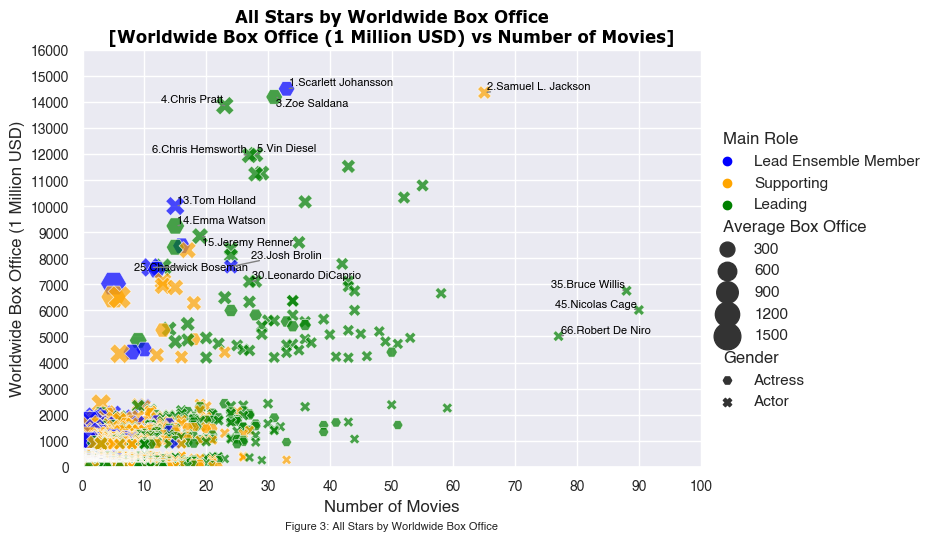

In [94]:
k = 20000
df = c_worldwide_leading_star1[c_worldwide_leading_star1['Name'].isin(c_worldwide_leading_star1[c_worldwide_leading_star1['Rank_u'] <= k]['Name'])]

df = df.rename(columns={'Average_u': 'Average Box Office', 'main_role': 'Main Role', 'gender': 'Gender'})

# Filter the specific warning
warnings.filterwarnings("ignore", category=UserWarning, message="Glyph .* missing from current font.")


plt.figure(dpi=150, figsize=(12, 8))

# Define marker styles for each main_role category
markers = {'Actor': 'X', 'Actress': 'H'}

# Set font
sns.set(font='Helvetica')

# Define custom hue colors
hue_colors = {'Lead Ensemble Member': 'blue', 'Supporting': 'orange', 'Leading': 'green', np.nan: 'gray'}

sns.relplot(data=df, x='Movies', y='WorldwideBoxOffice_u', kind='scatter',
            alpha=0.7, size='Average Box Office',
            sizes=(50, 400), palette=hue_colors,
            height=5, aspect=1.5, hue='Main Role', style='Gender', markers=markers)

# Annotate names
texts = []
for i in range(len(df)):
    if i in [0, 1, 2, 3, 4, 5, 12, 13, 14, 24, 22, 29, 34, 44, 65]:
        text = plt.text(df['Movies'].iloc[i], df['WorldwideBoxOffice_u'].iloc[i],
                        f"{i+1}.{df['name'].iloc[i]}",
                        fontsize=8, fontweight='bold', color='black',
                        ha='center')
        texts.append(text)

# Adjust the positions of annotations to avoid overlapping
adjust_text(texts, force_text=0.5, arrowprops=dict(arrowstyle="-", color='grey'))

# Set plot title and axis labels
plt.title('All Stars by Worldwide Box Office\n[Worldwide Box Office (1 Million USD) vs Number of Movies]',
          color='black', fontdict={'fontsize': 12, 'fontname': 'Verdana', 'fontweight': 'bold'})
plt.xlabel('Number of Movies', fontdict={'fontname': 'Helvetica', 'fontsize': 12})
plt.ylabel('Worldwide Box Office (1 Million USD)', fontdict={'fontname': 'Helvetica', 'fontsize': 12})

# Adjust y-axis limit with step size
y_min = 0
y_max = 16000
y_step = 1000
plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max + y_step, y_step), fontname='Helvetica', fontsize=10)

# Adjust x-axis limit with step size
x_min = 0
x_max = 100
x_step = 10
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max + x_step, x_step), fontname='Helvetica', fontsize=10)

# Customize legend
# plt.legend(title='Gender')
# plt.grid(alpha=0.3)

# # Customize legend
# legend_labels = ['Actor', 'Actress', 'Lead Ensemble Member', 'Supporting', 'Leading']
# legend_handles = [plt.Line2D([], [], marker='X', color='w', markerfacecolor='black', markersize=8),
#                   plt.Line2D([], [], marker='o', color='w', markerfacecolor='black', markersize=8),
#                   plt.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=8),
#                   plt.Line2D([], [], marker='o', color='w', markerfacecolor='orange', markersize=8),
#                   plt.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=8)]
# plt.legend(legend_handles, legend_labels, title='Main Role', prop={'family': 'Helvetica', 'size': 8})

# plt.grid(alpha=0.3)

# Annotate the figure name
figure_name = 'Figure 3: All Stars by Worldwide Box Office'
plt.text(0.5, -0.15, figure_name, transform=plt.gca().transAxes, fontsize=8, fontname = 'Helvetica', ha='center')

# Show the plot
plt.show()

## [6520422025] Kmeans Clustering

In [96]:
from sklearn.preprocessing import StandardScaler

k = 1000
df = c_worldwide_leading_star[c_worldwide_leading_star['Name'].isin(c_worldwide_leading_star[c_worldwide_leading_star['Rank_u'] <= k]['Name'])]
title_text = 'All Stars by Worldwide Box Office'
title_color = 'white'
title_background_color = 'darkred'
# Define the number of clusters
n_clusters = 7

# Choose a colormap
cmap = cm.get_cmap('tab10', n_clusters)  # 'tab10' colormap provides distinct colors for up to 10 categories

# Plotting code
fig, axes = plt.subplots(2, 2, dpi=150, figsize=(17, 13))
plt.suptitle(f'Star Clustering Visualization\n[Worldwide Box Office (1 Million USD) vs Number of Movies]', fontsize=20, backgroundcolor='darkred', color='white')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

for i in range(1, 5):
    # Perform clustering
    X = df[['WorldwideBoxOffice_u', 'Movies']].values
    # Scale the x and y values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=i + 3)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_

    plt.subplot(2, 2, i)
    plt.scatter(X_scaled[:, 1], X_scaled[:, 0], c=labels, cmap=cmap, alpha=0.7, s=100, edgecolors='black')
    plt.xlabel('Scaling Number of Movies', fontsize=12)
    plt.ylabel('Scaling Worldwide Box Office', fontsize=12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    # plt.ylabel('Average Box Office (1 Million USD)')
    plt.grid(alpha=0.3)
    plt.title(f'Cluster(n) = {i + 3}', color=title_color, backgroundcolor='blue',fontsize = 15)

plt.show()


ModuleNotFoundError: No module named 'sklearn'

# 4.Actor Peak Time

## [6520412006] Data Transform

In [109]:
act_peak = pd.merge(c_star_summary , c_star_info_data
                    ,left_on='name',right_on='name').loc[:,['name','title','release_date','date','gender','best_known_as','main_role','max_theaters_u','opening_weekend_u','max_theaters_u','worldwide_box_office_u'  ]]
# Merge c_star_summary and c_star_info_data based on the 'name' column and select relevant columns

act_peak['birth_year'] = pd.to_datetime(act_peak['date']).dt.year
# Extract the birth year from the 'date' column and assign it to the 'birth_year' column

# act_peak['release_year'] = pd.to_datetime(act_peak['release_date'], format='mixed', coerce=True).dt.year
# Convert the 'release_date' column to datetime format with mixed format, coerce errors, and extract the year.
# Note: This line is commented out.

act_peak['release_year'] = pd.to_datetime(act_peak['release_date'], errors='coerce').dt.year
# Convert the 'release_date' column to datetime format, handling coerce errors, and extract the year.
# Assign the result to the 'release_year' column.

act_peak['play_age'] = act_peak['release_year'] - act_peak['birth_year']
# Calculate the 'play_age' by subtracting 'birth_year' from 'release_year' and assign the result to the 'play_age' column.

act_peak = act_peak[act_peak['gender'] != 'Undefined']
# Filter out rows where 'gender' is 'Undefined'.

act_peak = act_peak[(act_peak['play_age'] >= 0) & (act_peak['play_age'] <= 90)]
# Filter out rows where 'play_age' is less than 0 or greater than 90.

act_peak = act_peak[act_peak['main_role'].isin(['Lead Ensemble Member', 'Supporting', 'Leading'])]
# Filter out rows where 'main_role' is not one of ['Lead Ensemble Member', 'Supporting', 'Leading'].

display(act_peak.head())
# Display the first few rows of the resulting DataFrame.


name           title  release_date        date   gender  \
0  Scarlett Johansson   Asteroid City  Jun 16, 2023  1984-11-22  Actress   
1  Scarlett Johansson          Sing 2  Dec 22, 2021  1984-11-22  Actress   
2  Scarlett Johansson     Black Widow   Jul 9, 2021  1984-11-22  Actress   
3  Scarlett Johansson  Marriage Story   Dec 6, 2019  1984-11-22  Actress   
4  Scarlett Johansson     Jojo Rabbit  Oct 18, 2019  1984-11-22  Actress   

                  best_known_as             main_role  max_theaters_u  \
0  Lead Ensemble Member Actress  Lead Ensemble Member             NaN   
1  Lead Ensemble Member Actress  Lead Ensemble Member          3892.0   
2  Lead Ensemble Member Actress  Lead Ensemble Member          4275.0   
3  Lead Ensemble Member Actress  Lead Ensemble Member             NaN   
4  Lead Ensemble Member Actress  Lead Ensemble Member          1173.0   

   opening_weekend_u  max_theaters_u  worldwide_box_office_u  birth_year  \
0                NaN             NaN                222000.0      1984.0   
1         22326230.0          3892.0             405466620.0      1984.0   
2         80366312.0          4275.0             379751131.0      1984.0   
3                NaN             NaN                321463.0      1984.0   
4           349555.0          1173.0              86878073.0      1984.0   

   release_year  play_age  
0        2023.0      39.0  
1        2021.0      37.0  
2        2021.0      37.0  
3        2019.0      35.0  
4        2019.0      35.0

## [6520412006] Distribution of Actors by Play Age with KDE

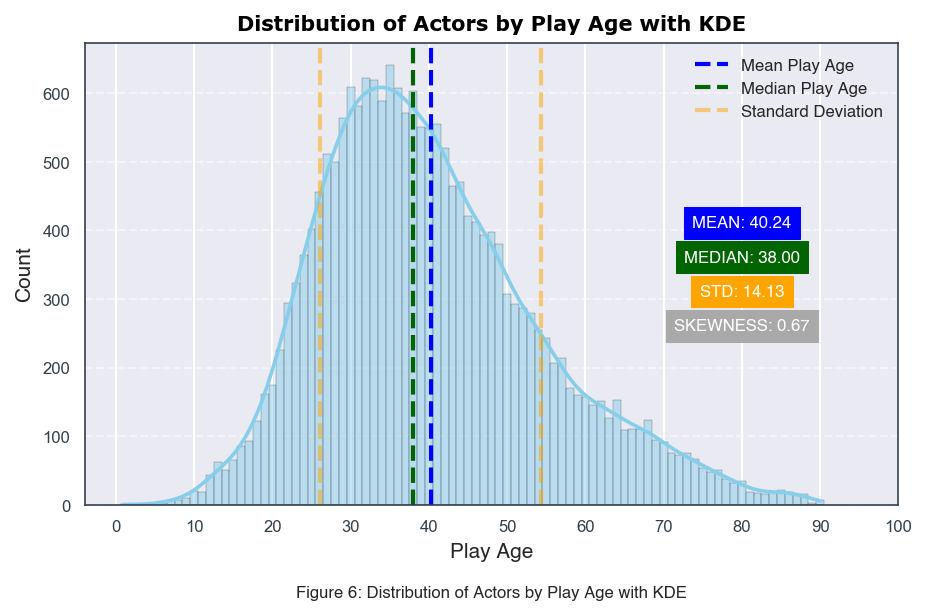

In [110]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(7, 4), dpi=150)

# Adjusting the appearance of the histogram
sns.histplot(data=act_peak, x='play_age', kde=True, discrete=True, ax=ax, 
             color='skyblue', edgecolor='black', linewidth=0.1)

# Customizing the plot
ax.set_xlabel('Play Age', fontdict={'fontname': 'Helvetica', 'fontsize': 10})
ax.set_ylabel('Count', fontdict={'fontname': 'Helvetica', 'fontsize': 10})
ax.set_title('Distribution of Actors by Play Age with KDE', 
             fontdict={'fontname': 'Verdana', 'color': 'black', 'fontsize': 10, 'fontweight': 'bold'})

# Adjusting the tick labels and grid
ax.tick_params(axis='both', which='major', labelsize=8)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xticks(range(0, 101, 10))  # Set x-axis step size to 10

# Adding vertical lines for mean, median, and standard deviation
mean_play_age = act_peak['play_age'].mean()
median_play_age = act_peak['play_age'].median()
std_play_age = act_peak['play_age'].std()

ax.axvline(mean_play_age, color='blue', linestyle='--', linewidth=2, label='Mean Play Age')
ax.axvline(median_play_age, color='darkgreen', linestyle='--', linewidth=2, label='Median Play Age')
ax.axvline(mean_play_age - std_play_age, color='orange', linestyle='--', linewidth=2, label='Standard Deviation', alpha=0.5)
ax.axvline(mean_play_age + std_play_age, color='orange', linestyle='--', linewidth=2, alpha=0.5)

# Calculate skewness
skewness = stats.skew(act_peak['play_age'])

# Annotating the mean, median, standard deviation, and skewness
ax.annotate(f'MEAN: {mean_play_age:.2f}', xy=(mean_play_age, 0), xytext=(80, 400),
             color='white', backgroundcolor='white', ha='center', va='bottom', 
             fontname='Helvetica', fontsize=8, 
             bbox=dict(facecolor='blue', edgecolor='blue', linewidth=0.5))
ax.annotate(f'MEDIAN: {median_play_age:.2f}', xy=(median_play_age, 0), xytext=(80, 350),
             color='white', backgroundcolor='white', ha='center', va='bottom', 
             fontname='Helvetica', fontsize=8, 
             bbox=dict(facecolor='darkgreen', edgecolor='darkgreen', linewidth=0.5))
ax.annotate(f'STD: {std_play_age:.2f}', xy=(mean_play_age + std_play_age, 0), xytext=(80, 300),
             color='white', backgroundcolor='white', ha='center', va='bottom', 
             fontname='Helvetica', fontsize=8, 
             bbox=dict(facecolor='orange', edgecolor='orange', linewidth=0.5))
ax.annotate(f'SKEWNESS: {skewness:.2f}', xy=(mean_play_age, 0), xytext=(80, 250),
             color='white', backgroundcolor='darkgrey', ha='center', va='bottom', 
             fontname='Helvetica', fontsize=8, 
             bbox=dict(facecolor='darkgrey', edgecolor='darkgrey', linewidth=0.5))

# Adding a legend
legend_font = {'family': 'Helvetica', 'size': 8}
ax.legend(prop=legend_font)

# Annotate the figure name
figure_name = 'Figure 6: Distribution of Actors by Play Age with KDE'
plt.text(0.5, -0.2, figure_name, transform=plt.gca().transAxes, fontsize=8, fontname = 'Helvetica', ha='center')

plt.show()


## [6520412006] Boxplot Distribution of Play Age by Gender

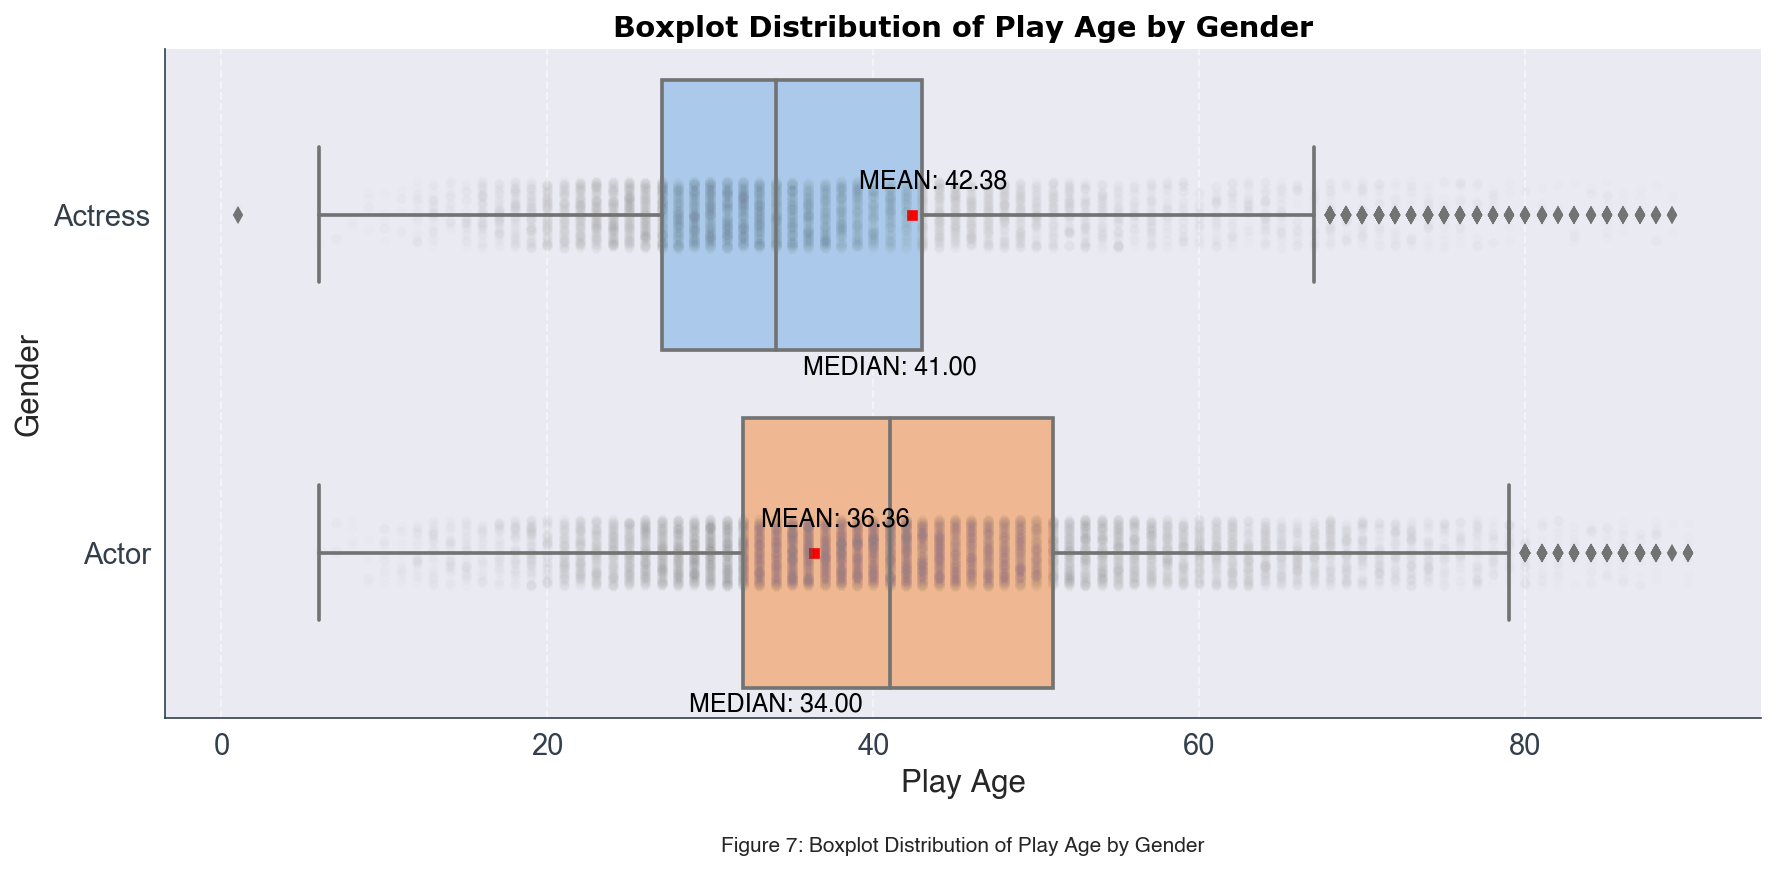

In [111]:
# Set the figure size and DPI
plt.figure(figsize=(12, 6), dpi=150)

# Adjusting the appearance of the box plot
sns.boxplot(data=act_peak, y='gender', x='play_age', orient='h', palette='pastel')

# Adding a strip plot
sns.stripplot(data=act_peak, y='gender', x='play_age', orient='h', color='grey', alpha=0.01)

# Calculate the mean and median values for each category
mean_values = act_peak.groupby('gender')['play_age'].mean()
median_values = act_peak.groupby('gender')['play_age'].median()

# Plotting mean points and annotations
for i, gender in enumerate(mean_values.index):
    mean_age = mean_values[gender]
    median_age = median_values[gender]
    plt.scatter(mean_age, i, color='red', marker='s', s=20, label='Mean')
    plt.annotate(f'MEAN: {mean_age:.2f}', xy=(mean_age, i-0.1), xytext=(10, 0), textcoords='offset points',
                 color='black', ha='center', va='center', fontname='Helvetica', fontsize=12)
    plt.text(median_age, i+0.45, f'MEDIAN: {median_age:.2f}', color='black', ha='center', va='center',
             fontdict={'fontname': 'Helvetica', 'fontsize': 12})

# Customizing the plot
plt.xlabel('Play Age', fontdict={'fontsize': 15, 'fontname': 'Helvetica'})
plt.ylabel('Gender', fontdict={'fontsize': 15, 'fontname': 'Helvetica'})
plt.title('Boxplot Distribution of Play Age by Gender', fontsize=14,
          fontdict={'fontname': 'Verdana', 'color': 'black', 'fontsize': 10, 'fontweight': 'bold'})

# Adjusting the tick labels and grid
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Removing the top and right spines
sns.despine()

# Adding a legend
# plt.legend(title='Gender', title_fontsize=10, loc='upper right')

# Annotate the figure name
figure_name = 'Figure 7: Boxplot Distribution of Play Age by Gender'
plt.text(0.5, -0.2, figure_name, transform=plt.gca().transAxes, fontsize=10, fontname = 'Helvetica', ha='center')

plt.tight_layout()
plt.show()


## [6520412006] Boxplot Distribution of Play Age by Main Role

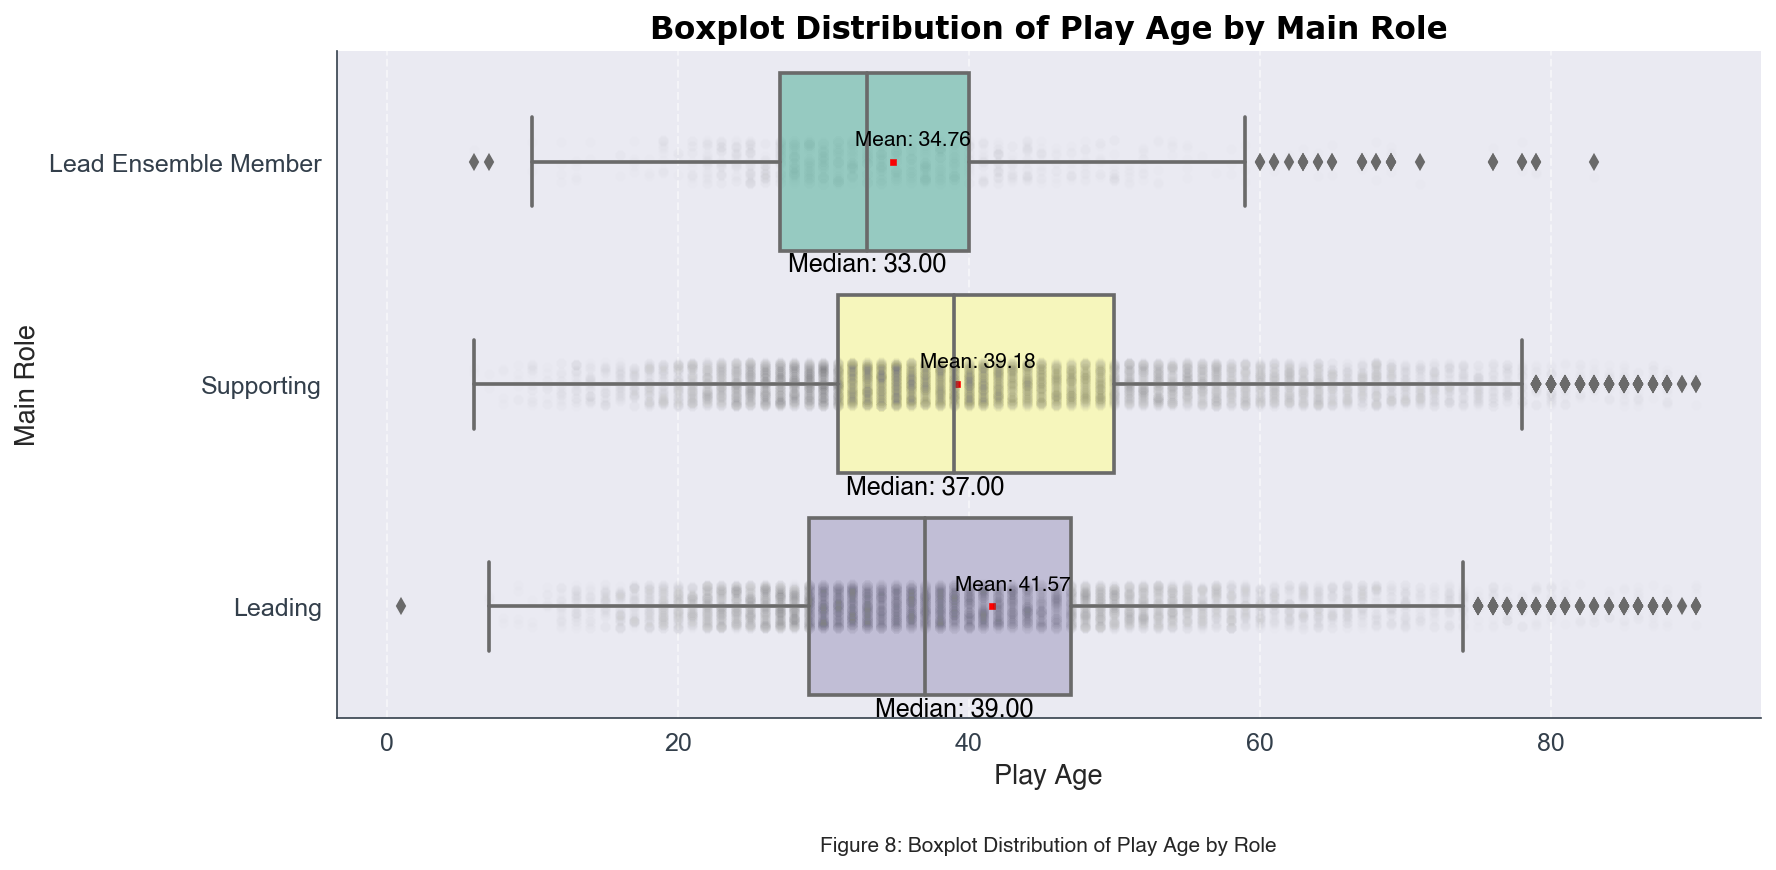

In [112]:
# Set the figure size and DPI
plt.figure(figsize=(12, 6), dpi=150)

# Adjusting the appearance of the box plot
sns.boxplot(data=act_peak, y='main_role', x='play_age', orient='h', palette='Set3')

# Adding a strip plot
sns.stripplot(data=act_peak, y='main_role', x='play_age', orient='h', color='grey', alpha=0.01)

# Calculate the mean and median values for each category
mean_values = act_peak.groupby('main_role')['play_age'].mean()
median_values = act_peak.groupby('main_role')['play_age'].median()

# Plotting mean points and annotations
for i, main_role in enumerate(mean_values.index):
    mean_age = mean_values[main_role]
    median_age = median_values[main_role]
    plt.scatter(mean_age, i, color='red', marker='s', s=10, label='Mean')
    plt.annotate(f'Mean: {mean_age:.2f}', xy=(mean_age, i-0.1), xytext=(10, 0), textcoords='offset points',
                 color='black', ha='center', va='center', fontname='Helvetica', fontsize=10)
    plt.text(median_age, i+0.46, f'Median: {median_age:.2f}', color='black', ha='center', va='center',
             fontdict={'fontname': 'Helvetica', 'fontsize': 12})

# Customizing the plot
plt.xlabel('Play Age', fontdict={'fontname': 'Helvetica', 'fontsize': 13})
plt.ylabel('Main Role', fontdict={'fontname': 'Helvetica', 'fontsize': 13})
plt.title('Boxplot Distribution of Play Age by Main Role',
          fontdict={'fontname': 'Verdana', 'color': 'black', 'fontsize': 15, 'fontweight': 'bold'})
          # backgroundcolor='darkred', color='white',
          # bbox=dict(facecolor='darkred', edgecolor='black', linewidth=1))

# Adjusting the tick labels and grid
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Removing the top and right spines
sns.despine()

# Adding a legend
# plt.legend()

# Annotate the figure name
figure_name = 'Figure 8: Boxplot Distribution of Play Age by Role'
plt.text(0.5, -0.2, figure_name, transform=plt.gca().transAxes, fontsize=10, fontname = 'Helvetica', ha='center')

plt.tight_layout()
plt.show()


# [6520422025] 5.Most Collab Star

/var/folders/xn/r6g6gmhd0jl_k9sn_4sp2vzr0000gp/T/ipykernel_97992/3852170684.py:71: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/xn/r6g6gmhd0jl_k9sn_4sp2vzr0000gp/T/ipykernel_97992/3852170684.py:71: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



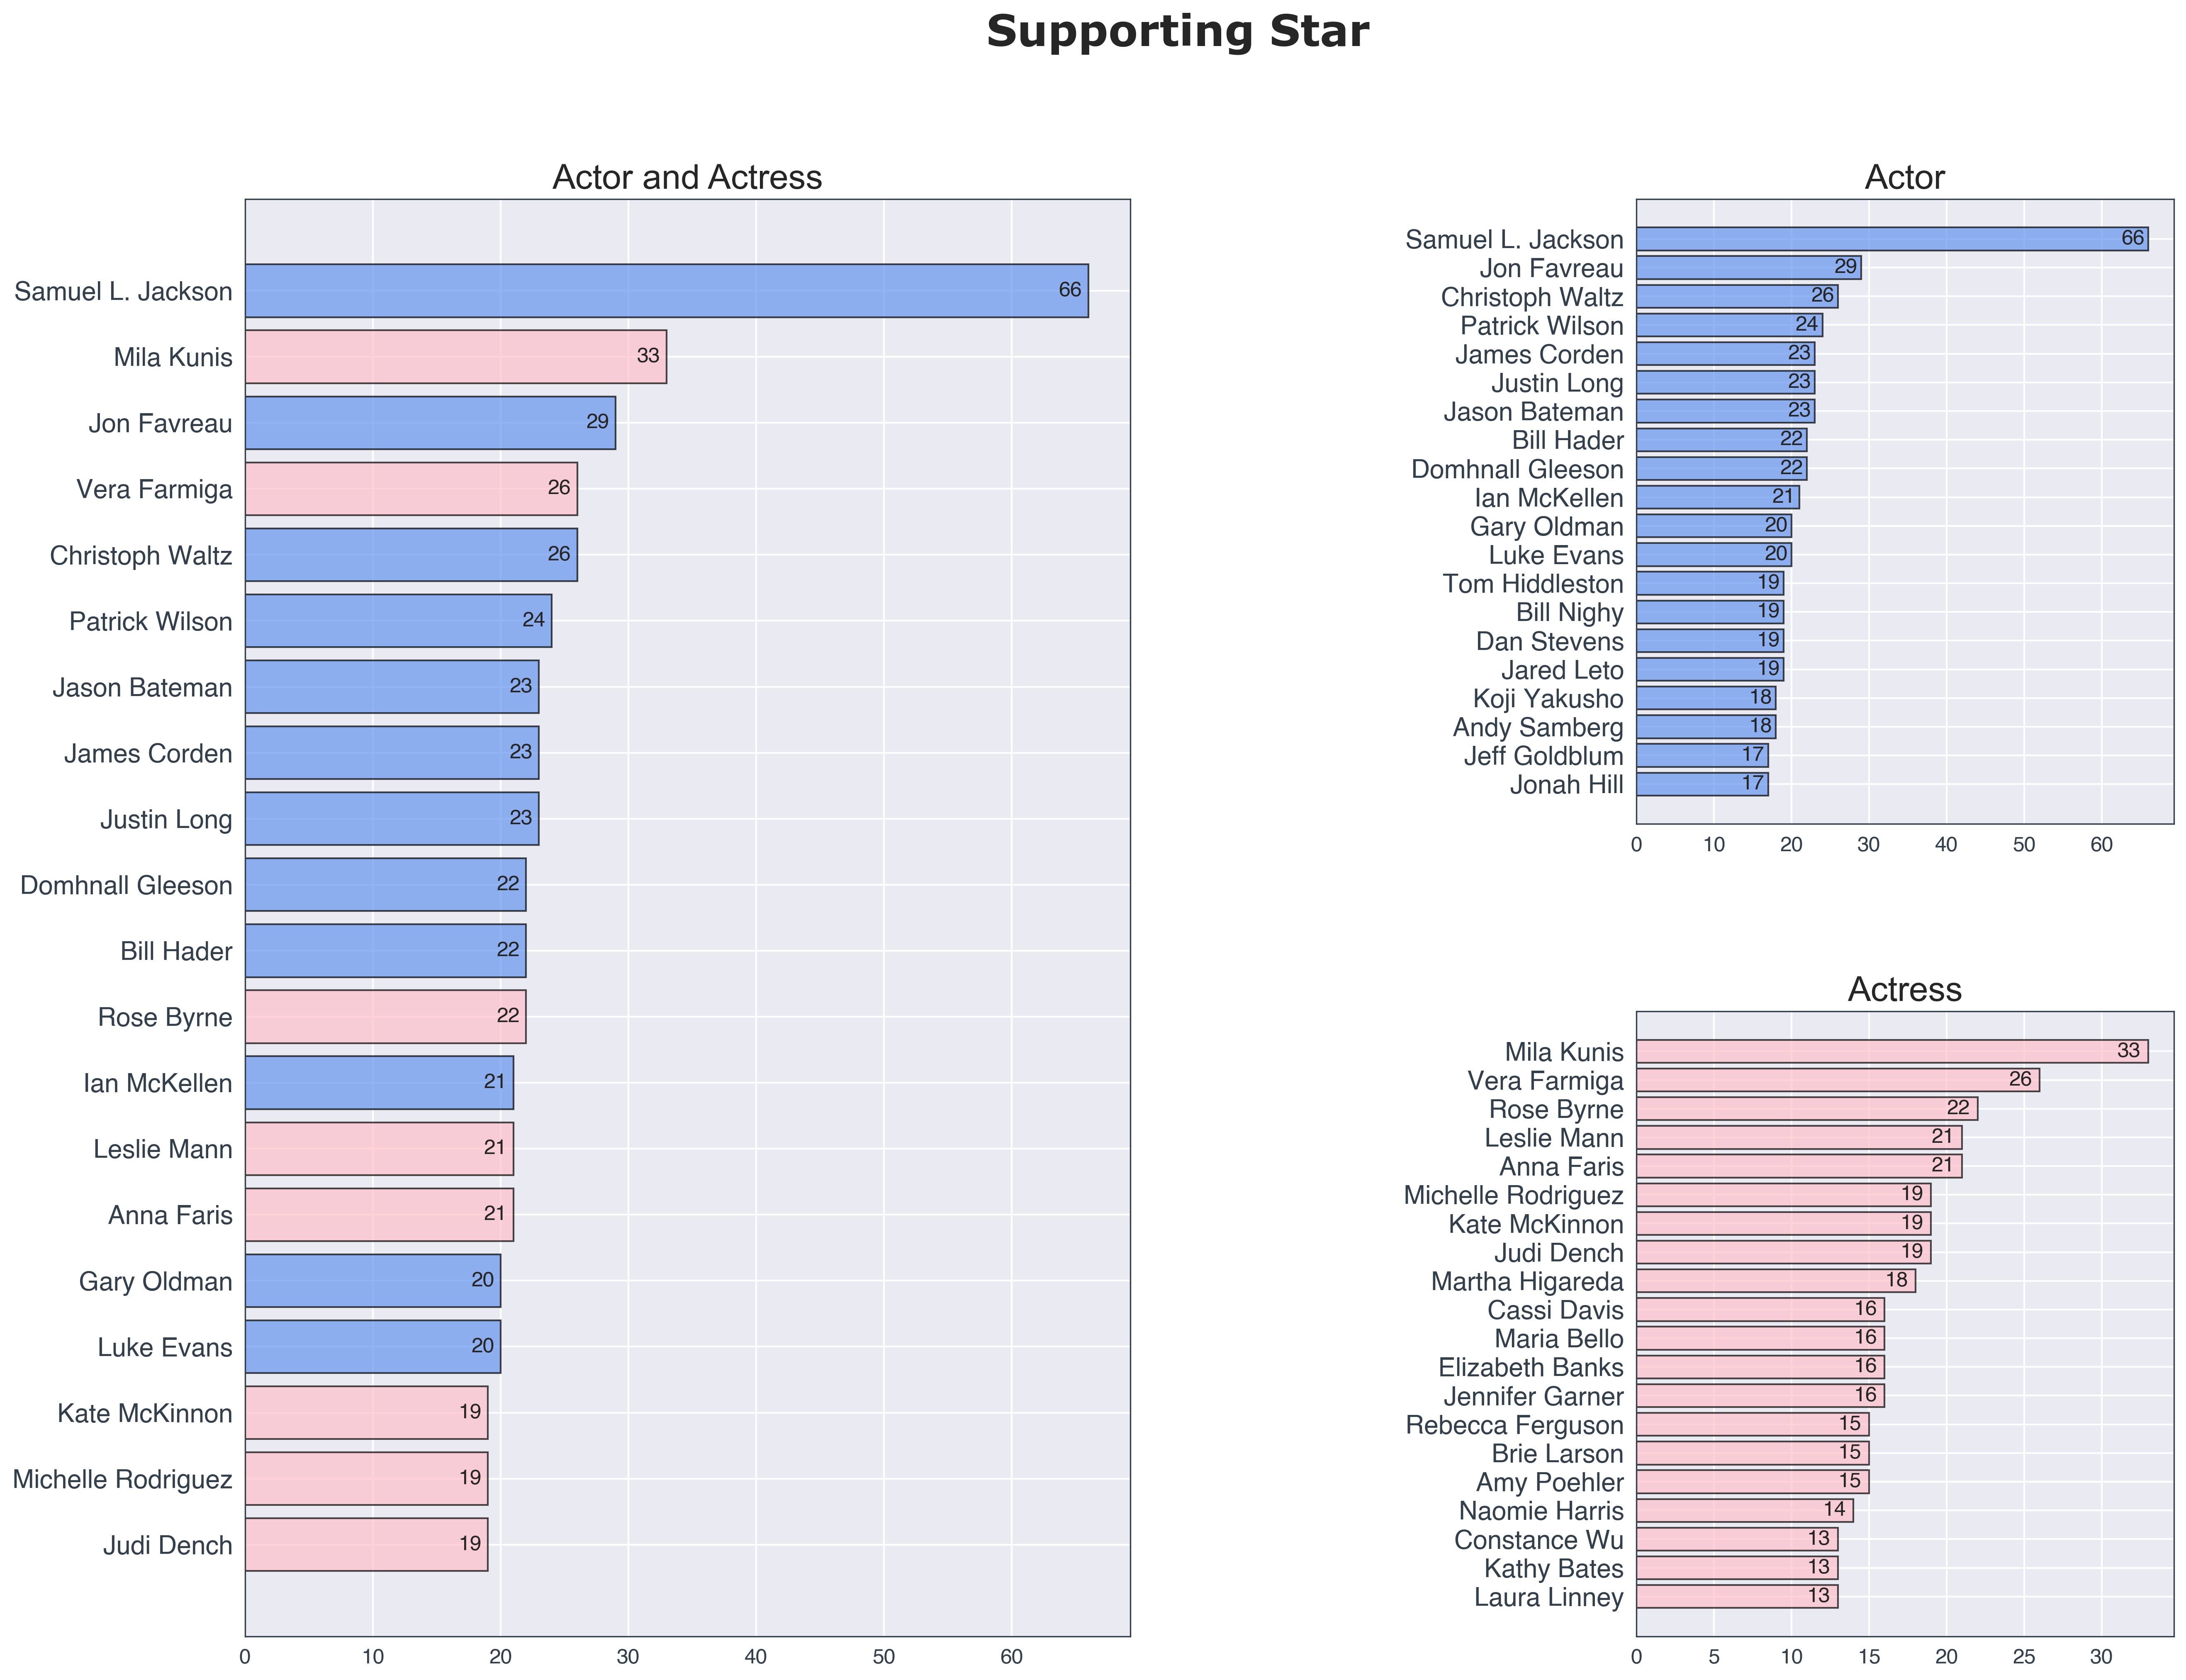

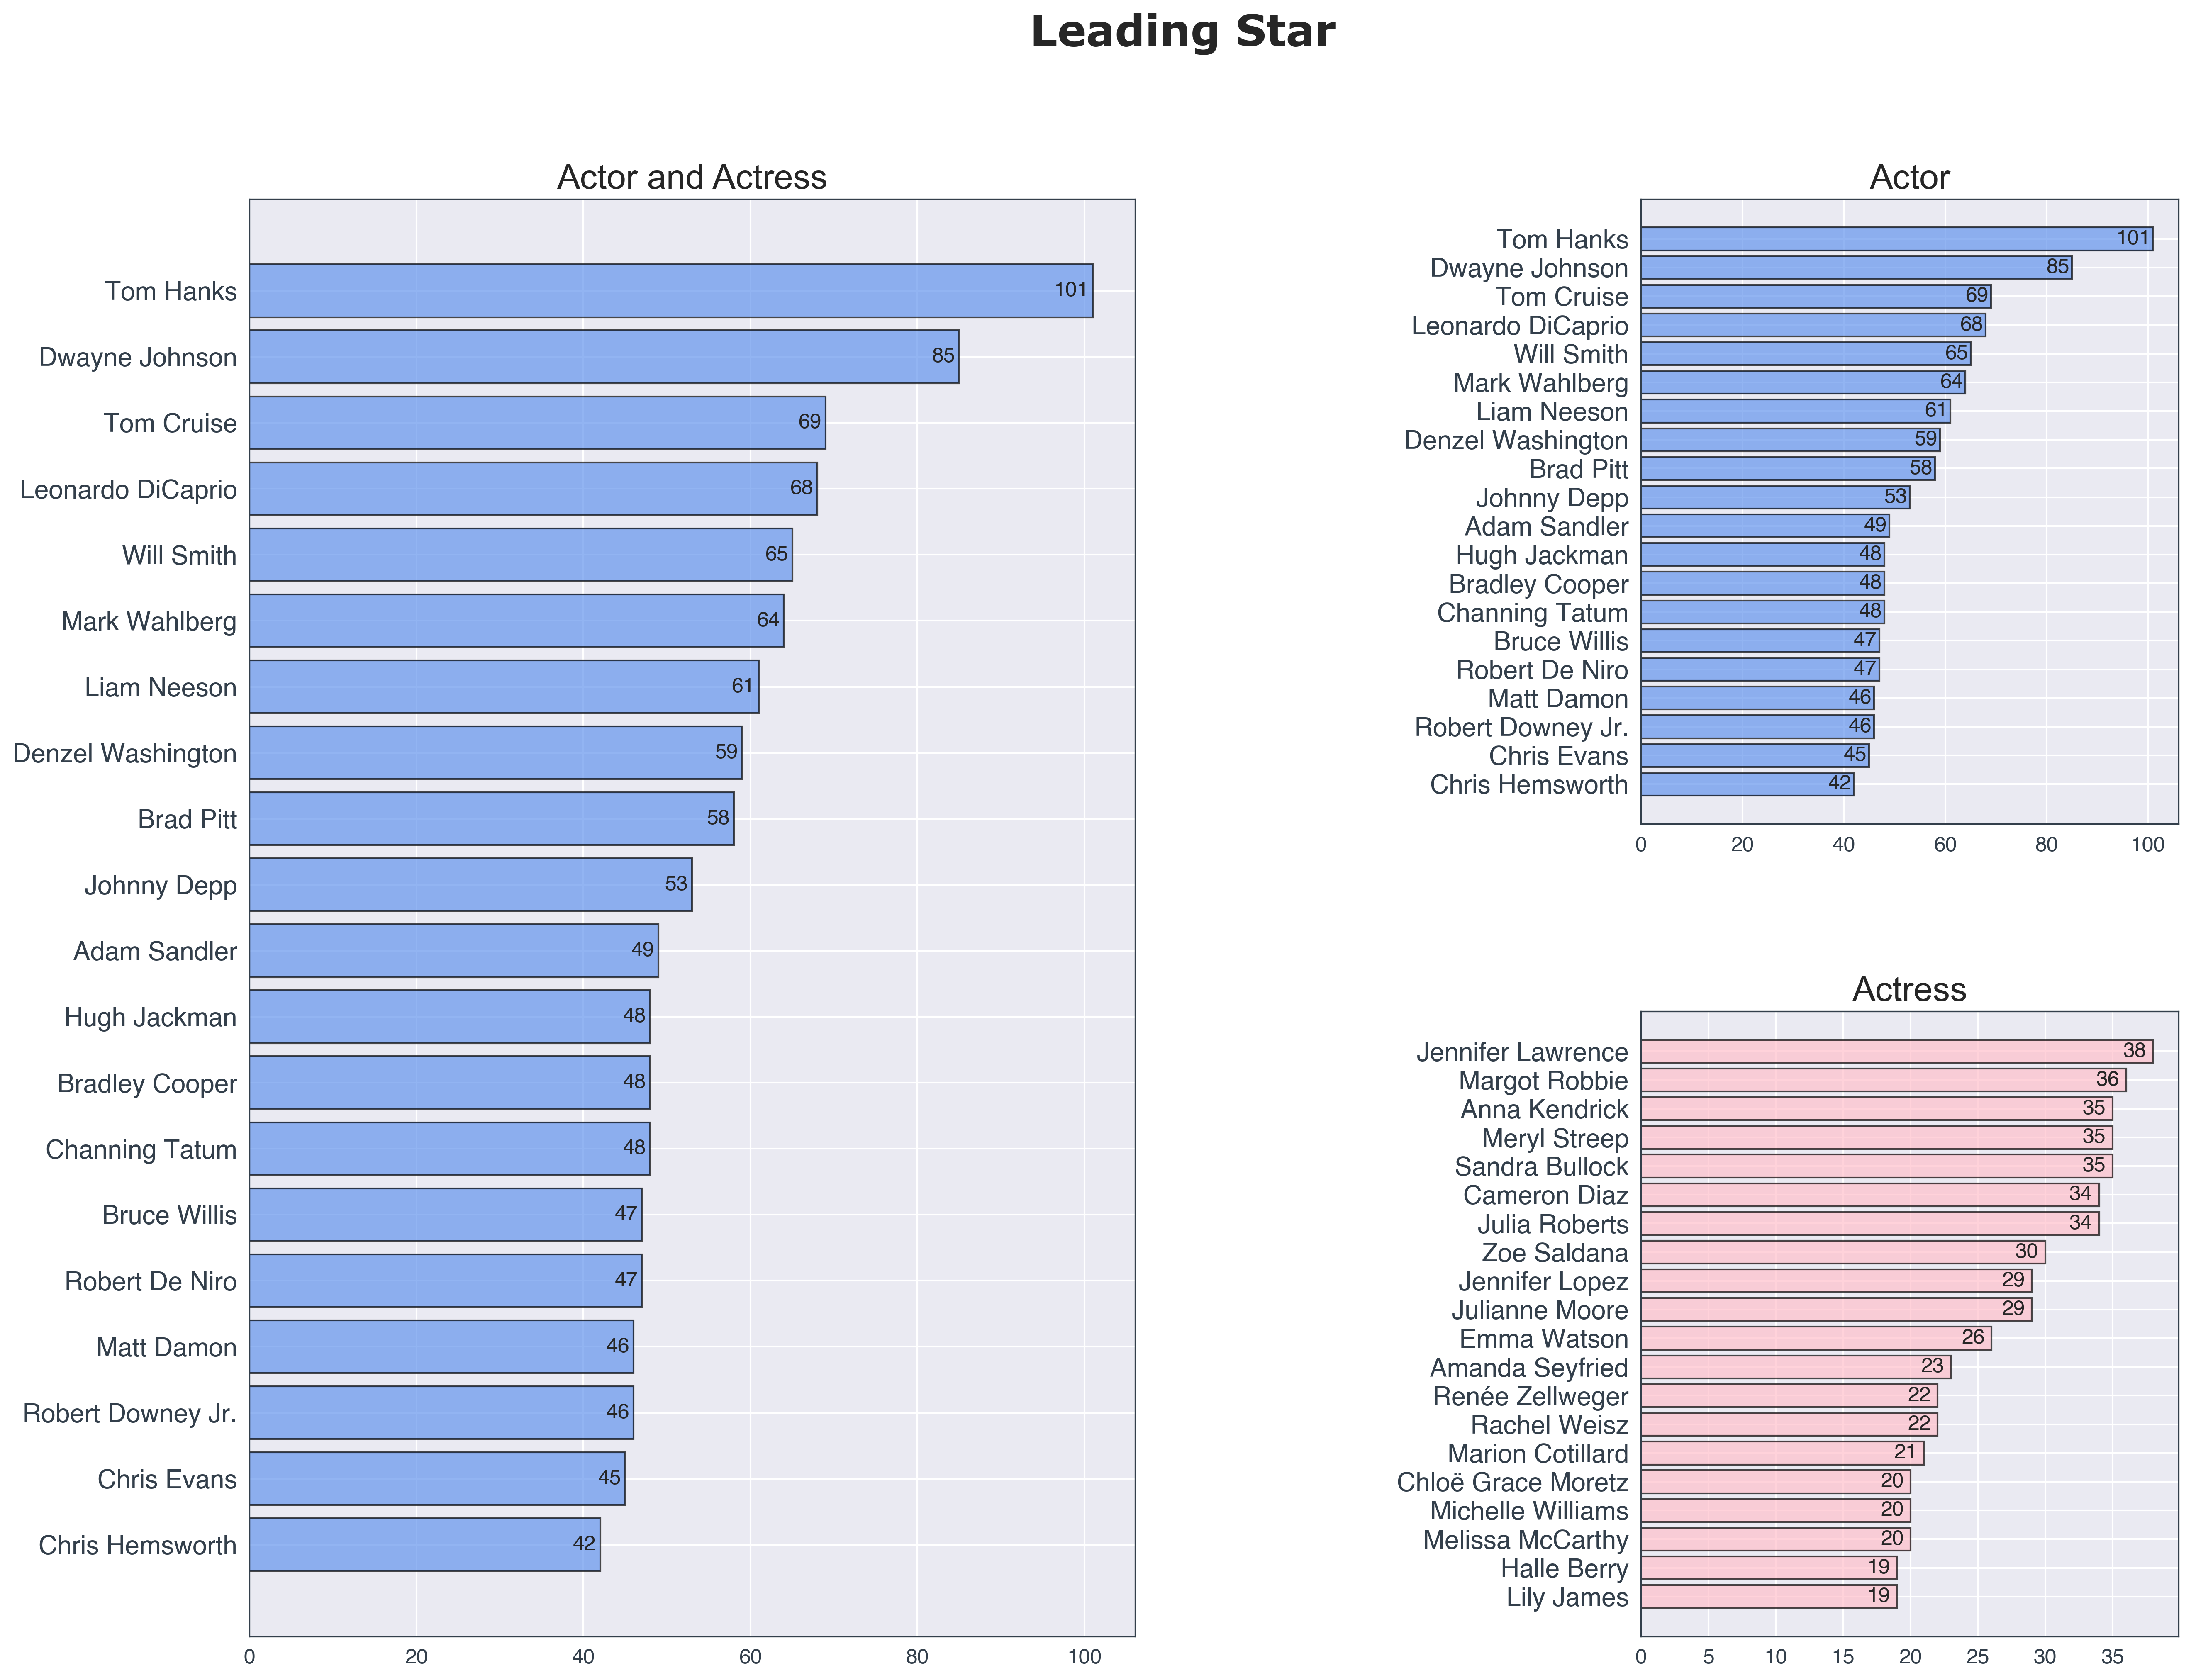

In [100]:
def collab_df_func(col):
    # col = 'Supporting'
    # star_merge = pd.merge(c_star_info_data,c_star_info_data,left_on='name',right_on='name',how='left')
    df = c_star_info_data
    
    # Uncomment the following lines if you want to filter the data based on the 'main_role' column
    # df = df[df.name.isin(c_star_info_data.query(f""" main_role == '{col}' """)['name'])]
    # df = df[df.main_role == col]
    
    # Define global variables for storing collaboration data
    global collab_df
    global collab_df_filter
    global collab_df_filter_all
    global collab_df_filter_men
    global collab_df_filter_woman
    
    # Perform data transformation and aggregation
    collab_df = pd.melt(df, id_vars=['name'], value_vars=['most_collab_0', 'most_collab_1', 'most_collab_2', 'most_collab_3', 'most_collab_4']).drop(['variable'], axis=1)
    collab_df.rename(columns={'value': 'target'}, inplace=True)
    collab_df = collab_df.groupby(['name', 'target']).size().to_frame().reset_index()
    collab_df.columns = list(collab_df.columns[:-1]) + ['weight']
    
    # Filter collaboration data based on the 'main_role' column
    name_filter = c_star_info_data.query(f""" main_role == '{col}' """)['name']
    collab_df = collab_df[collab_df.target.isin(name_filter)]
    collab_df.sort_values('weight', ascending=True)

    # Perform additional aggregation for filtering
    collab_df_filter = collab_df.groupby('target')[['name']].count().sort_values('name', ascending=False).reset_index()
    
    # Filter collaboration data for actors
    man_filter = c_star_info_data.query(f""" gender == 'Actor' """)['name']
    collab_df_filter_men = collab_df_filter[collab_df_filter.target.isin(man_filter)]
    collab_df_filter_men = collab_df_filter_men[:20]

    # Filter collaboration data for actresses
    women_filter = c_star_info_data.query(f""" gender == 'Actress' """)['name']
    collab_df_filter_woman = collab_df_filter[collab_df_filter.target.isin(women_filter)]
    collab_df_filter_woman = collab_df_filter_woman[:20]
        
    # Filter collaboration data for all categories
    collab_df_filter_all = collab_df_filter[:20]
    collab_df_filter_all = collab_df_filter_all[collab_df_filter_all.target.isin(collab_df_filter['target'])]

    
# Set style
plt.style.use('seaborn-v0_8')

# Set plot configurations
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.color'] = '#333F4B'
plt.rcParams['ytick.color'] = '#333F4B'

# Iterate over the main_role values of c_star_info_data
for i in c_star_info_data.main_role.value_counts().index[:2]:
    # Call the collab_df_func to generate collaboration data
    collab_df_func(i)
    
    # (Optional) Figure settings
    plt.figure(dpi=300, figsize=(20, 15))
    plt.suptitle(f"""{i} Star""", fontname='Verdana', fontsize=25, fontweight='bold')
    
    # Annotate the figure name
    figure_name = 'Figure 8: Boxplot Distribution of Play Age by Role'
    plt.text(0.5, -0.2, figure_name, transform=plt.gca().transAxes, fontsize=10, fontname = 'Helvetica', ha='center')

    grid = plt.GridSpec(2, 12, wspace=10, hspace=0.3) # Create a grid of 2 rows and 12 columns
    
    # Subplot 1: Actor and Actress collaboration
    plt.subplot(grid[0:2, 0:6])
    collab_df_filter_barh = collab_df_filter_all.sort_values('name', ascending=1)
    bar_colors = pd.merge(collab_df_filter_barh, c_star_info_data[['name', 'gender']], left_on='target', right_on='name')
    bar_colors = ['pink' if i == 'Actress' else 'cornflowerblue' for i in bar_colors['gender']]
    plt.barh(collab_df_filter_barh['target'], collab_df_filter_barh['name'], edgecolor='black', linewidth=1, color=bar_colors, alpha=0.7)
    for i, (name, target) in enumerate(zip(collab_df_filter_barh['name'], collab_df_filter_barh['target'])):
        plt.text(name - 0.5, target, str(name), ha='right', va='center', fontname='Helvetica', fontsize=12)
    plt.title('Actor and Actress',fontsize=20)
    plt.xticks(fontname='Helvetica', fontsize=12)
    plt.yticks(fontname='Helvetica', fontsize=15)
    
    # Subplot 2: Actor collaboration
    plt.subplot(grid[0, 8:])
    collab_df_filter_barh = collab_df_filter_men.sort_values('name', ascending=1)
    bar_colors = pd.merge(collab_df_filter_barh, c_star_info_data[['name', 'gender']], left_on='target', right_on='name')
    bar_colors = ['pink' if i == 'Actress' else 'cornflowerblue' for i in bar_colors['gender']]
    plt.barh(collab_df_filter_barh['target'], collab_df_filter_barh['name'], edgecolor='black', linewidth=1, color=bar_colors, alpha=0.7)
    for i, (name, target) in enumerate(zip(collab_df_filter_barh['name'], collab_df_filter_barh['target'])):
        plt.text(name - 0.5, target, str(name), ha='right', va='center', fontname='Helvetica', fontsize=12)
    plt.title('Actor',fontsize=20)
    plt.xticks(fontname='Helvetica', fontsize=12)
    plt.yticks(fontname='Helvetica', fontsize=15)

    # Subplot 3: Actress collaboration
    plt.subplot(grid[1, 8:])
    collab_df_filter_barh = collab_df_filter_woman.sort_values('name', ascending=1)
    bar_colors = pd.merge(collab_df_filter_barh, c_star_info_data[['name', 'gender']], left_on='target', right_on='name')
    bar_colors = ['pink' if i == 'Actress' else 'cornflowerblue' for i in bar_colors['gender']]
    plt.barh(collab_df_filter_barh['target'], collab_df_filter_barh['name'], edgecolor='black', linewidth=1, color=bar_colors, alpha=0.7)
    for i, (name, target) in enumerate(zip(collab_df_filter_barh['name'], collab_df_filter_barh['target'])):
        plt.text(name - 0.5, target, str(name), ha='right', va='center', fontname='Helvetica', fontsize=12)
    plt.title('Actress',fontsize=20)
    plt.xticks(fontname='Helvetica', fontsize=12)
    plt.yticks(fontname='Helvetica', fontsize=15)

# 7.Awards vs Genre

## [6520422025] Data Transform

In [101]:
# Define a function to remove parentheses and text within them
def remove_parentheses(text):
    return text.str.replace(r'\([^)]*\)', '', regex=True)

fiter_top_1000 = c_worldwide_leading_star[c_worldwide_leading_star['Rank_u'] <= 300 ]['Name']

# Create a new column 'movie_title_cleaned' in the c_star_summary DataFrame
# This column contains the movie titles with parentheses removed and leading/trailing whitespaces stripped
c_star_summary['movie_title_cleaned'] = remove_parentheses(c_star_summary['movie_title']).str.strip()

# Merge the cleaned_genres DataFrame with the academy_awards DataFrame
# The merge is based on the 'title' column in cleaned_genres and the 'winner' column in academy_awards
# The resulting DataFrame contains movies that have won awards at the Academy Awards
genres_award1 = pd.merge(cleaned_genres, academy_awards, left_on='title', right_on='winner', how='inner')

# Merge the cleaned_genres DataFrame with the bafta_awards DataFrame
# The merge is based on the 'title' column in cleaned_genres and the 'winner' column in bafta_awards
# The resulting DataFrame contains movies that have won awards at the BAFTA Awards
genres_award2 = pd.merge(cleaned_genres, bafta_awards, left_on='title', right_on='winner', how='inner')

# Merge the cleaned_genres DataFrame with the golden_globe_awards DataFrame
# The merge is based on the 'title' column in cleaned_genres and the 'winner' column in golden_globe_awards
# The resulting DataFrame contains movies that have won awards at the Golden Globe Awards
genres_award3 = pd.merge(cleaned_genres, golden_globe_awards, left_on='title', right_on='winner', how='inner')

# Concatenate the three DataFrames (genres_award1, genres_award2, genres_award3) vertically
# The resulting DataFrame contains movies that have won awards at any of the three awards shows
merge_genre_award = pd.concat([genres_award1, genres_award2, genres_award3], axis=0)

# Filter out rows where the 'awards_name' column contains 'Actor', 'Actress', or 'Direct'
# This removes rows related to individual acting and directing awards
merge_genre_award = merge_genre_award[~merge_genre_award['awards_name'].str.contains('Actor|Actress|Direct')]

# Group the data by 'genres' and 'awards_name' columns and count the occurrences
merge_genre_award_sum = merge_genre_award.groupby(['genres', 'awards_name']).size().reset_index().rename(columns={0: 'count'})


## [6520422025] Pareto Chart of Award Movies by Genres

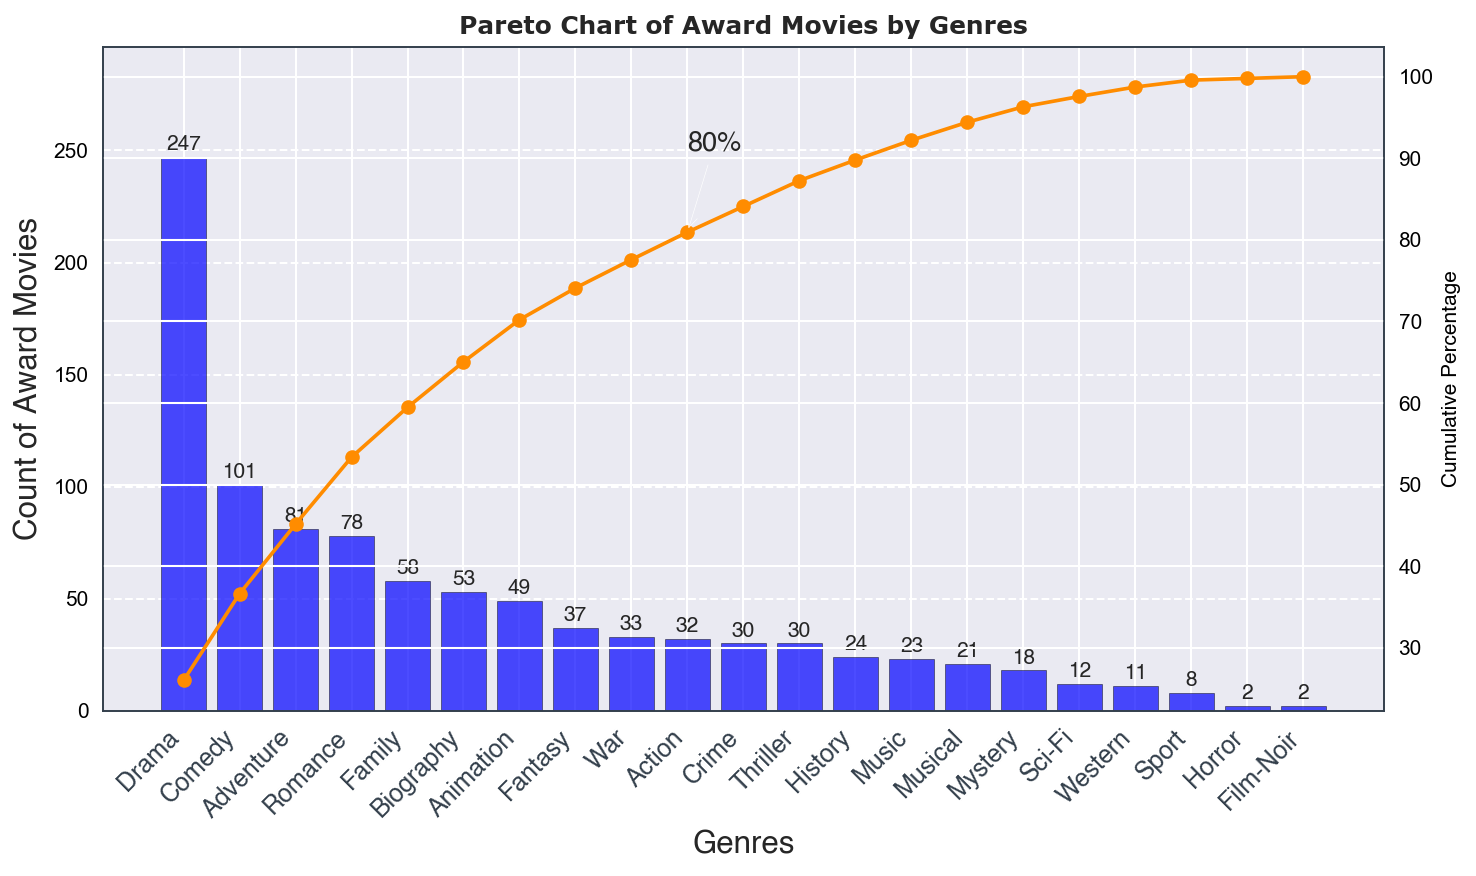

In [102]:
# Sort the merge_genre_award_sum DataFrame by the sum of counts for each genre in descending order
# The resulting DataFrame 'df' contains the genres and their corresponding counts of award movies
df = merge_genre_award_sum.groupby('genres').sum('count').sort_values(by='count', ascending=False).reset_index()

# Calculate the cumulative percentage of the award movies
df['cumulative_percentage'] = (df['count'].cumsum() / df['count'].sum()) * 100

# Create the Pareto chart figure and axes
fig, ax1 = plt.subplots(dpi=150, figsize=(10, 6))

# Plot the bar chart for the count of award movies by genres
ax1.bar(df['genres'], df['count'], color='blue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Genres', fontdict={'fontname': 'Helvetica', 'fontsize': 15})
ax1.set_ylabel('Count of Award Movies', fontdict={'fontname': 'Helvetica', 'fontsize': 15})
ax1.tick_params('y', colors='black')

# Add value labels to the bars
for i, count in enumerate(df['count']):
    ax1.text(i, count + 3, str(count), ha='center', fontdict={'fontname': 'Helvetica', 'fontsize': 10})

# Create the secondary y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(df['genres'], df['cumulative_percentage'], color='darkorange', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='black', fontname='Helvetica', fontsize=10)
ax2.tick_params('y', colors='black')

# Format the axes and grid lines
ax1.set_ylim(0, max(df['count']) * 1.2)
ax1.set_xticklabels(df['genres'], rotation=45, ha='right', fontname='Helvetica', fontsize=12)
ax1.grid(axis='y', linestyle='--')

# Annotate the 80% cumulative percentage point
target_percentage = 80
target_index = df[df['cumulative_percentage'] >= target_percentage].index[0]
ax2.annotate(f'{target_percentage}%', xy=(target_index, df['cumulative_percentage'].iloc[target_index]),
             xytext=(target_index, df['cumulative_percentage'].iloc[target_index] + 10),
             arrowprops=dict(arrowstyle='->'),
             fontname='Helvetica', fontsize=13)

# Set the chart title
plt.title('Pareto Chart of Award Movies by Genres', fontname='Verdana', fontsize=12, fontweight='bold')

# Show the chart
plt.tight_layout()
plt.show()


In [103]:
# # Sort the merge_genre_award_sum DataFrame by the sum of counts for each genre in descending order
# # The resulting DataFrame 'df' contains the genres and their corresponding counts of award movies
# df = merge_genre_award_sum.groupby('genres').sum('count').sort_values(by='count', ascending=False).reset_index()

# # Calculate the cumulative percentage of the award movies
# df['cumulative_percentage'] = (df['count'].cumsum() / df['count'].sum()) * 100

# # Create the lollipop chart figure and axes
# fig, ax = plt.subplots(dpi=150, figsize=(10, 6))

# # Plot the lollipops for the count of award movies by genres
# ax.vlines(x=df['genres'], ymin=0, ymax=df['count'], color='blue', alpha=0.7)
# ax.scatter(x=df['genres'], y=df['count'], color='blue', edgecolor='black', alpha=0.7)
# ax.set_xlabel('Genres', fontdict={'fontname': 'Helvetica', 'fontsize': 15})
# ax.set_ylabel('Count of Award Movies', fontdict={'fontname': 'Helvetica', 'fontsize': 15})
# ax.tick_params('y', colors='black')

# # Add value labels to the lollipops
# for i, count in enumerate(df['count']):
#     ax.text(i, count + 3, str(count), ha='center', fontdict={'fontname': 'Helvetica', 'fontsize': 10})

# # Create the secondary y-axis for the cumulative percentage
# ax2 = ax.twinx()
# ax2.plot(df['genres'], df['cumulative_percentage'], color='darkorange', marker='o')
# ax2.set_ylabel('Cumulative Percentage', color='black', fontname='Helvetica', fontsize=10)
# ax2.tick_params('y', colors='black')

# # Format the axes and grid lines
# ax.set_ylim(0, max(df['count']) * 1.2)
# ax.set_xticklabels(df['genres'], rotation=45, ha='right', fontname='Helvetica', fontsize=12)
# ax.grid(axis='y', linestyle='--')

# # Annotate the 80% cumulative percentage point
# target_percentage = 80
# target_index = df[df['cumulative_percentage'] >= target_percentage].index[0]
# ax2.annotate(f'{target_percentage}%', xy=(target_index, df['cumulative_percentage'].iloc[target_index]),
#              xytext=(target_index, df['cumulative_percentage'].iloc[target_index] + 10),
#              arrowprops=dict(arrowstyle='->'),
#              fontname='Helvetica', fontsize=13)

# # Set the chart title
# plt.title('Pareto Chart of Award Movies by Genres', fontname='Verdana', fontsize=12, fontweight='bold')

# # Show the chart
# plt.tight_layout()
# plt.show()


## [6520422025] Sankey Chart\nGenres and All Movie Awards

In [104]:
# Group the data by genres and awards_name, count the occurrences, and rename the count column
df = merge_genre_award.groupby(['genres', 'awards_name']).size().reset_index().rename(columns={0: 'count'})

# Filter the genres to include only the top 5 genres with the highest counts of award movies
top_genres = merge_genre_award_sum.groupby('genres')['count'].sum().sort_values(ascending=False).reset_index()[:5]['genres']
df = df[df['genres'].isin(top_genres)]

# Map similar awards to a common name using the award_mapping dictionary
award_mapping = {
    'Best Animated Feature': 'Best Animated Feature Film',
    'Best Animated Feature Film of the Year': 'Best Animated Feature Film',
    'Best Animated Featured Film': 'Best Animated Feature Film',
    'Best Animated Film': 'Best Animated Feature Film',
    'Best Motion Picture - Animated': 'Best Animated Feature Film',
    'Best Motion Picture - Comedy or Musical': 'Best Motion Picture - Comedy',
    'Best Motion Picture - Drama': 'Best Picture',
    'Best International Feature Film': 'Best Foreign Language Film',
    'Best Motion Picture - Foreign Language': 'Best Foreign Language Film',
    'Best Motion Picture - Musical or Comedy': 'Best Motion Picture - Musical',
    'Best Motion Picture of the Year': 'Best Picture',
    'Best Foreign Film': 'Best Foreign Language Film',
    'Best Foreign Language Film of the Year': 'Best Foreign Language Film',
    'Best Motion Picture - Musical': 'Best Motion Picture - Musical',
    'Best Picture, Unique and Artistic Production': 'Best Picture'
}
df['awards_name'] = df['awards_name'].map(award_mapping).fillna(academy_awards_imdb['awards_name'])

# Remove rows with null awards_name values
df = df[df['awards_name'].notnull()]

# Generate the colormap for node colors
colormap = colors.qualitative.Pastel

# Create a dictionary to store the colors for each source node
source_colors = {}

# Generate the Sankey diagram figure
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=50,
        line=dict(color="black", width=1),
        label=df['genres'].unique().tolist() + df['awards_name'].unique().tolist(),
        color=[source_colors.setdefault(node, colormap[i % len(colormap)]) for i, node in enumerate(df['genres'].unique())],
    ),
    link=dict(
        source=df['genres'].astype('category').cat.codes,
        target=(df['genres'].nunique() + df['awards_name'].astype('category').cat.codes),
        value=df['count'],
        color=[source_colors[source] for source in df['genres']],
    )
)])

# Set the layout for the Sankey diagram
fig.update_layout(
    title_text='Sankey Chart\nGenres and All Movie Awards',
    font=dict(
        family="Verdana",  # Change the fontname for the title here (e.g., Verdana)
        size=15,  # Adjust the title font size if needed
        color="black",  # Set the title font color
    ),
    height=550,  # Adjust the height of the figure
    width=1000   # Adjust the width of the figure
)

# Annotate the figure name
figure_name = 'Figure 11: Sankey Chart Top 10 Genres and All Movie Awards'
fig.add_annotation(
    x=0.5,
    y=-0.15,
    text=figure_name,
    showarrow=False,
    font=dict(
        family='Helvetica',  # Change the fontname for the annotation here (e.g., Verdana)
        size=12,  # Adjust the annotation font size if needed
        color='black'  # Set the annotation font color
    )
)

# Display the Sankey diagram
display(fig)


## [6520422025] Venn Data Transform

In [105]:
# Create a wide table by setting the index as 'title' and 'genres' as columns
wide_table = merge_genre_award.set_index(['title', merge_genre_award.groupby('title').cumcount()])['genres'].unstack().fillna('')

# Remove the column names for the wide table
wide_table.columns.name = None

# Reset the index of the wide table
wide_table.reset_index(inplace=True)

# Create a new column 'all_genre' by concatenating values from each column (excluding the first column)
wide_table['all_genre'] = wide_table.apply(lambda row: [row[i] for i in wide_table.columns[1::]], axis=1)

# Keep only the 'title' and 'all_genre' columns
wide_table = wide_table[['title', 'all_genre']]

# Create a new column 'focus_genre' that contains only genres from ['Drama', 'Comedy', 'Romance']
wide_table['focus_genre'] = wide_table['all_genre'].apply(lambda x: [genre for genre in x if genre in ['Drama', 'Comedy', 'Romance']])

# Create a new column 'set' by joining unique genres from 'focus_genre'
wide_table['set'] = wide_table.apply(lambda x: ','.join(set(x['focus_genre'])), axis=1)

# Filter out rows where 'set' is not null and not empty
wide_table = wide_table[(wide_table['set'].notnull()) & (wide_table['set'] != '')]

# Count the occurrences of each unique value in the 'set' column
value_counts = wide_table['set'].value_counts()


## [6520422025] Venn Diagram

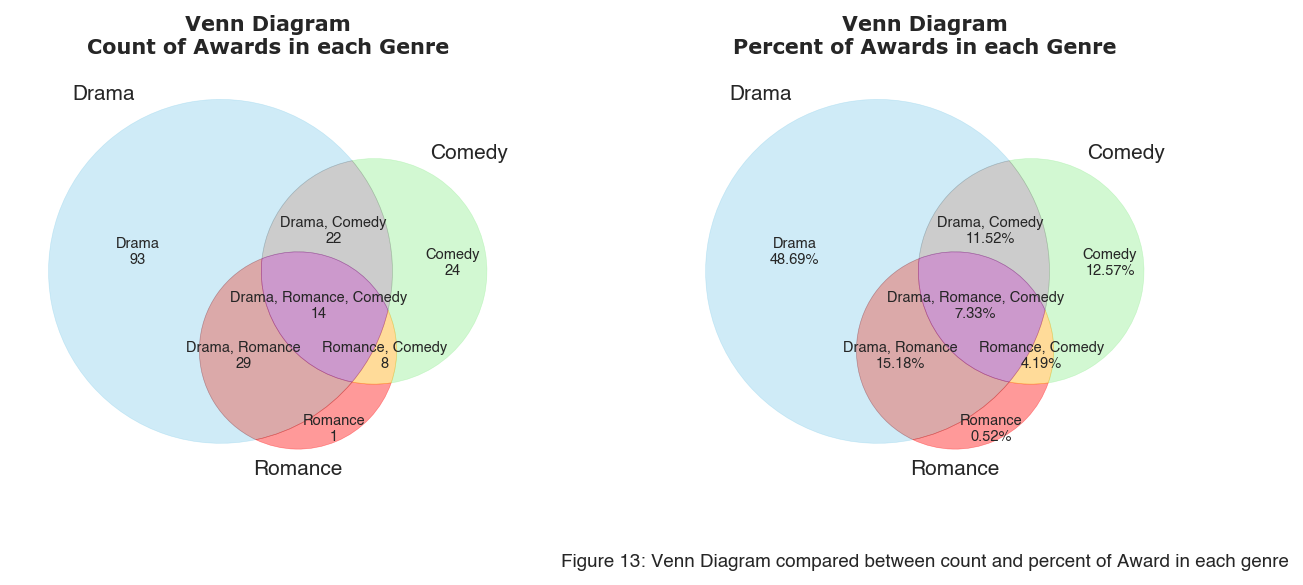

In [106]:
# Define the sizes of the sets
sizes = {
    '100': 93,  # Drama
    '101': 29,  # Drama, Romance
    '010': 24,  # Comedy
    '110': 22,  # Drama, Comedy
    '111': 14,  # Drama, Romance, Comedy
    '011': 8,   # Romance, Comedy
    '001': 1    # Romance
}

# Calculate the percentages for each size
values = sizes.values()
total_sum = sum(values)
percentages = [(value / total_sum) * 100 for value in values]
formatted_percentages = [f"{percentage:.2f}%" for percentage in percentages]

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=150)

# Plot the first Venn diagram on the first axis
venn1 = venn3(subsets=sizes, set_labels=('Drama', 'Comedy', 'Romance'), set_colors=('skyblue', 'lightgreen', 'purple'), ax=axs[0])
# Set individual patch colors for each subset
venn1.get_patch_by_id('100').set_color('skyblue')
venn1.get_patch_by_id('101').set_color('brown')
venn1.get_patch_by_id('010').set_color('lightgreen')
venn1.get_patch_by_id('110').set_color('grey')
venn1.get_patch_by_id('111').set_color('purple')
venn1.get_patch_by_id('011').set_color('orange')
venn1.get_patch_by_id('001').set_color('red')
# Set labels and font properties
for text in venn1.set_labels:
    text.set_fontsize(10)
    text.set_fontname('Helvetica')
for text in venn1.subset_labels:
    text.set_fontsize(7)
    text.set_fontname('Helvetica')
venn1.get_label_by_id('100').set_text(f'Drama\n93')
venn1.get_label_by_id('101').set_text(f'Drama, Romance\n29')
venn1.get_label_by_id('010').set_text(f'Comedy\n24')
venn1.get_label_by_id('110').set_text(f'Drama, Comedy\n22')
venn1.get_label_by_id('111').set_text(f'Drama, Romance, Comedy\n14')
venn1.get_label_by_id('011').set_text(f'Romance, Comedy\n8')
venn1.get_label_by_id('001').set_text(f'Romance\n1')
axs[0].set_title("Venn Diagram\nCount of Awards in each Genre", fontsize=10, fontname='Verdana', fontweight='bold')

# Plot the second Venn diagram on the second axis
venn2 = venn3(subsets=sizes, set_labels=('Drama', 'Comedy', 'Romance'), set_colors=('skyblue', 'lightgreen', 'purple'), ax=axs[1])
# Set individual patch colors for each subset
venn2.get_patch_by_id('100').set_color('skyblue')
venn2.get_patch_by_id('101').set_color('brown')
venn2.get_patch_by_id('010').set_color('lightgreen')
venn2.get_patch_by_id('110').set_color('grey')
venn2.get_patch_by_id('111').set_color('purple')
venn2.get_patch_by_id('011').set_color('orange')
venn2.get_patch_by_id('001').set_color('red')
# Set labels and font properties
for text in venn2.set_labels:
    text.set_fontsize(10)
    text.set_fontname('Helvetica')
for text in venn2.subset_labels:
    text.set_fontsize(7)
    text.set_fontname('Helvetica')
venn2.get_label_by_id('100').set_text(f'Drama\n{formatted_percentages[0]}')
venn2.get_label_by_id('101').set_text(f'Drama, Romance\n{formatted_percentages[1]}')
venn2.get_label_by_id('010').set_text(f'Comedy\n{formatted_percentages[2]}')
venn2.get_label_by_id('110').set_text(f'Drama, Comedy\n{formatted_percentages[3]}')
venn2.get_label_by_id('111').set_text(f'Drama, Romance, Comedy\n{formatted_percentages[4]}')
venn2.get_label_by_id('011').set_text(f'Romance, Comedy\n{formatted_percentages[5]}')
venn2.get_label_by_id('001').set_text(f'Romance\n{formatted_percentages[6]}')
axs[1].set_title("Venn Diagram\nPercent of Awards in each Genre", fontsize=10, fontname='Verdana', fontweight='bold')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Annotate the figure name
figure_name = 'Figure 13: Venn Diagram compared between count and percent of Award in each genre'
plt.text(0.5, -0.2, figure_name, transform=plt.gca().transAxes, fontsize=9, fontname = 'Helvetica', ha='center')

# Display the plot
plt.show()


# 8.Gross Vs Month,Year

## [6520422030] Data Transform

In [107]:
# Drop duplicates based on selected columns and select specific columns
df = c_star_summary.drop_duplicates(subset=['movie_title', 'release_date', 'opening_weekend_u', 'worldwide_box_office_u']).loc[:, ['movie_title', 'release_date', 'opening_weekend_u', 'worldwide_box_office_u']]

# Filter out rows with missing values in any of the selected columns
df = df[df[['movie_title', 'release_date', 'opening_weekend_u', 'worldwide_box_office_u']].notnull().all(axis=1)]

# Convert 'worldwide_box_office_u' column from dollars to million dollars and change the data type to 'int32'
df['worldwide_box_office_u'] = (df['worldwide_box_office_u'] / 1000000).astype('int32')

# Convert 'release_date' column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], format='mixed')

# Extract year and month information from 'release_date' column
df['release_date_year_month'] = df['release_date'].dt.strftime('%Y%m')
df['release_date_month'] = df['release_date'].dt.strftime('%m')
df['release_date_year'] = df['release_date'].dt.year

# Filter out rows with release dates between 2000 and 2022
df = df[(df['release_date'].dt.year >= 2000) & (df['release_date'].dt.year <= 2022)]

# Display the head of the DataFrame
df.head()


movie_title release_date  opening_weekend_u  \
1                 Sing 2 (2021)   2021-12-22         22326230.0   
2            Black Widow (2021)   2021-07-09         80366312.0   
4  Jojo Rabbit (Germany) (2019)   2019-10-18           349555.0   
5       Avengers Endgame (2019)   2019-04-26        357115007.0   
6         Avengers Infinity War   2018-04-27        257698183.0   

   worldwide_box_office_u release_date_year_month release_date_month  \
1                     405                  202112                 12   
2                     379                  202107                 07   
4                      86                  201910                 10   
5                    2794                  201904                 04   
6                    2048                  201804                 04   

   release_date_year  
1               2021  
2               2021  
4               2019  
5               2019  
6               2018

## [6520422030] Heatmap of Gross by each year and month

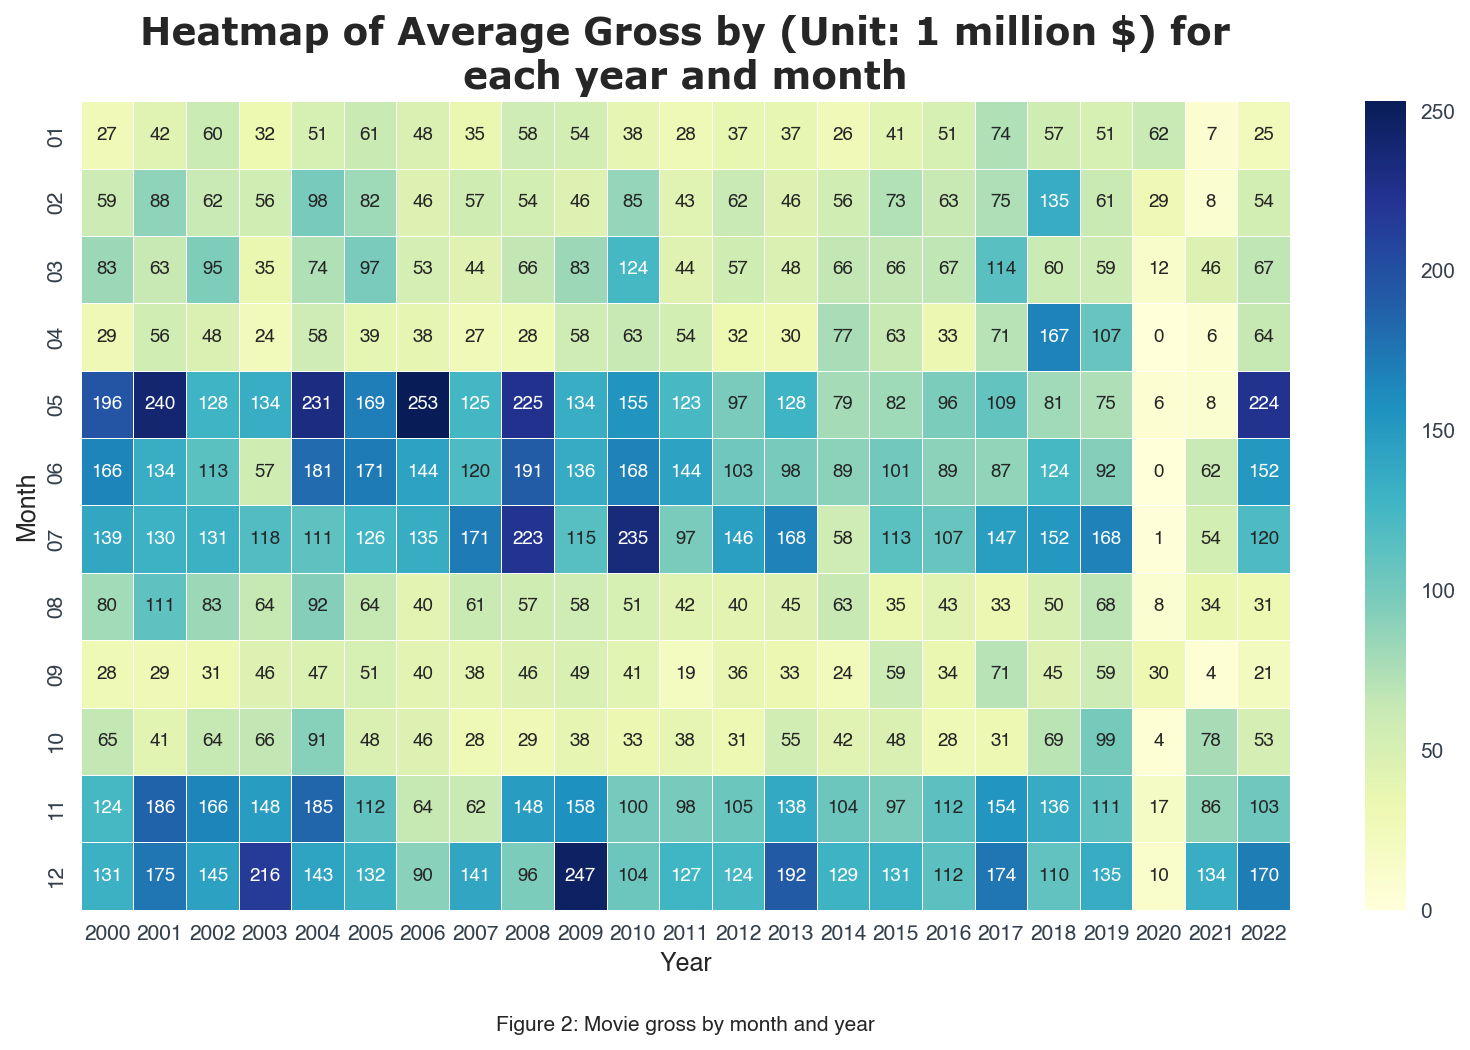

In [108]:
# Create a pivot table with 'release_date_month' as the index, 'release_date_year' as the columns, and 'worldwide_box_office_u' as the values using the mean aggregation
df_heatmap = df.pivot_table(index='release_date_month', columns='release_date_year', values='worldwide_box_office_u', aggfunc='mean').astype('int')

# Define the plot figure and axes
fig, ax = plt.subplots(figsize=(13, 7),dpi = 150)

# Add a title to the heatmap
plt.title("Heatmap of Average Gross by (Unit: 1 million $) for\neach year and month", fontsize=18, fontname='Verdana', fontweight='bold')
ttl = ax.title
ttl.set_position([0.5, 1.05])

# Set the X and Y axis labels
ax.set_xlabel('Release Date Year', fontdict={'fontname': 'Helvetica', 'fontsize': 8})
ax.set_ylabel('Release Date Month', fontdict={'fontname': 'Helvetica', 'fontsize': 8})
plt.yticks(fontsize=10, fontname='Helvetica')
plt.xticks(fontsize=10, fontname='Helvetica')



# Use the seaborn package's heatmap function to plot the heatmap
sns.heatmap(df_heatmap, fmt="", cmap='YlGnBu', linewidths=0.30, ax=ax, annot=True,
            annot_kws={'fontname': 'Helvetica', 'fontsize': 9})

ax.set_xlabel('Year', fontdict={'fontname': 'Helvetica', 'fontsize': 12})
ax.set_ylabel('Month', fontdict={'fontname': 'Helvetica', 'fontsize': 12})

# Annotate the figure name
figure_name = 'Figure 2: Movie gross by month and year'
plt.text(0.5, -0.15, figure_name, transform=plt.gca().transAxes, fontsize=10, fontname = 'Helvetica', ha='center')

# Display the heatmap
plt.show()